In [ ]:
pip install --upgrade xlrd

FB Dataset

MultiBlox Plot

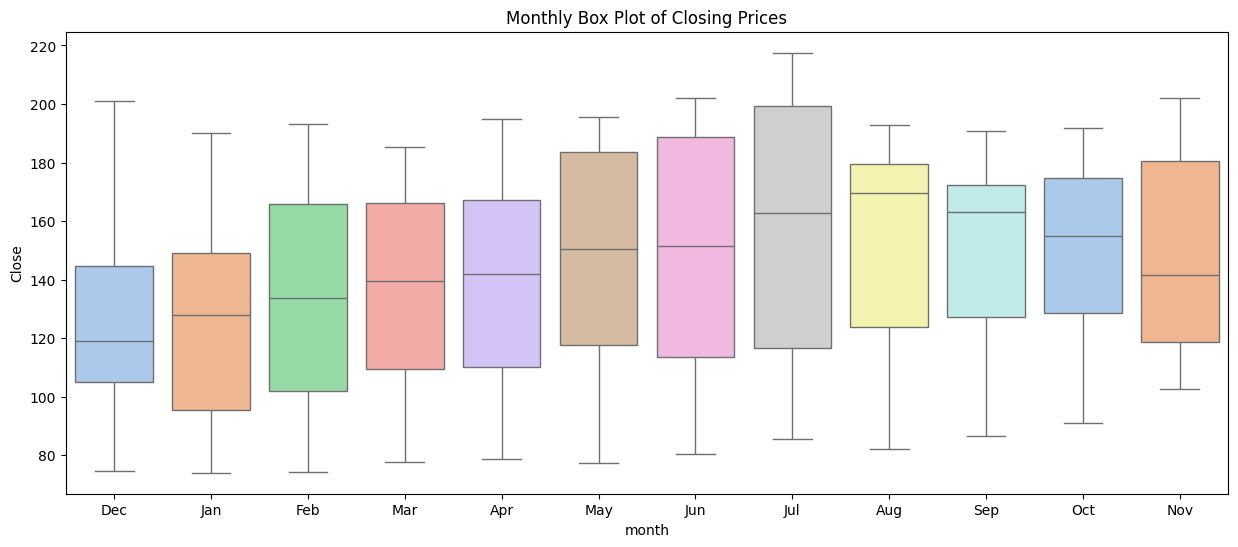

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('FB.csv', parse_dates=['Date'])

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year

# Plotting
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='Close', data=df, palette='pastel').set_title("Monthly Box Plot of Closing Prices")
plt.show()


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Index(['2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
       '2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18', '2014-12-19',
       ...
       '2019-11-22', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29',
       '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06'],
      dtype='object', name='Date', length=1259)


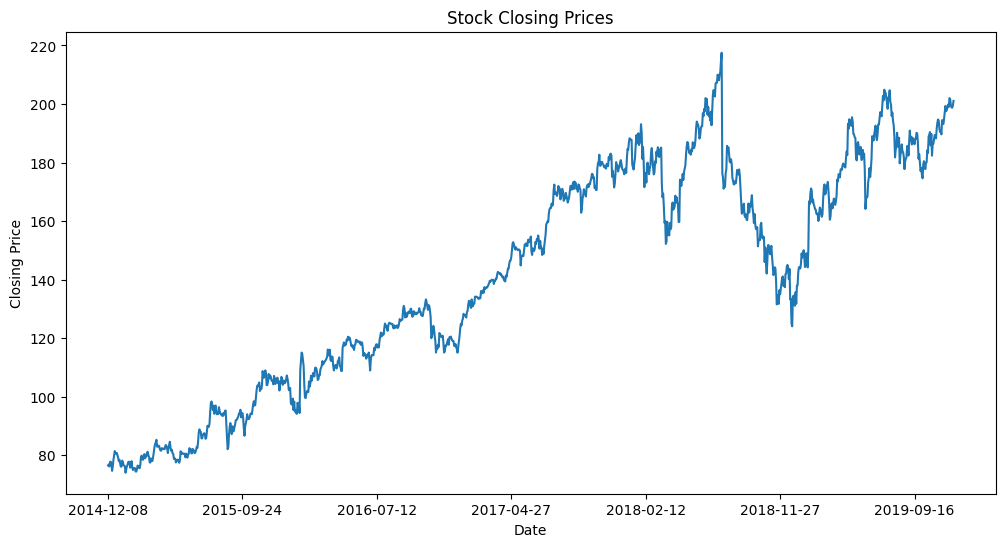

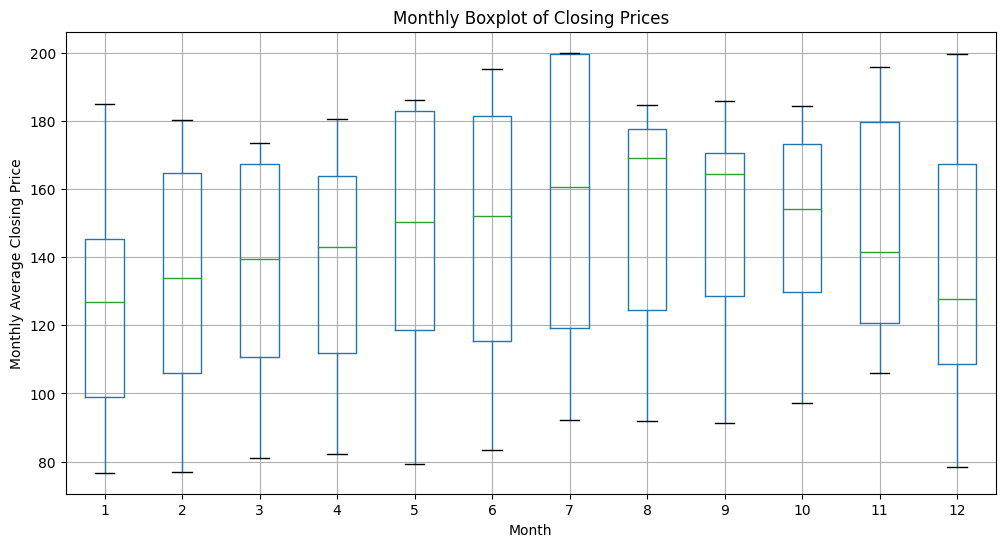

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'FB.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

print(data.dtypes)

data.set_index('Date', inplace=True)

print(data.index)

plt.figure(figsize=(12, 6))
data['Close'].plot()
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices')
plt.show()

if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

monthly_data = data['Close'].resample('M').mean()

months = monthly_data.groupby(monthly_data.index.month)
months_df = pd.DataFrame({i+1: months.get_group(i+1) for i in range(12)})

plt.figure(figsize=(12, 6))
months_df.boxplot()
plt.xlabel('Month')
plt.ylabel('Monthly Average Closing Price')
plt.title('Monthly Boxplot of Closing Prices')
plt.show()



AutoCorrelation Plot

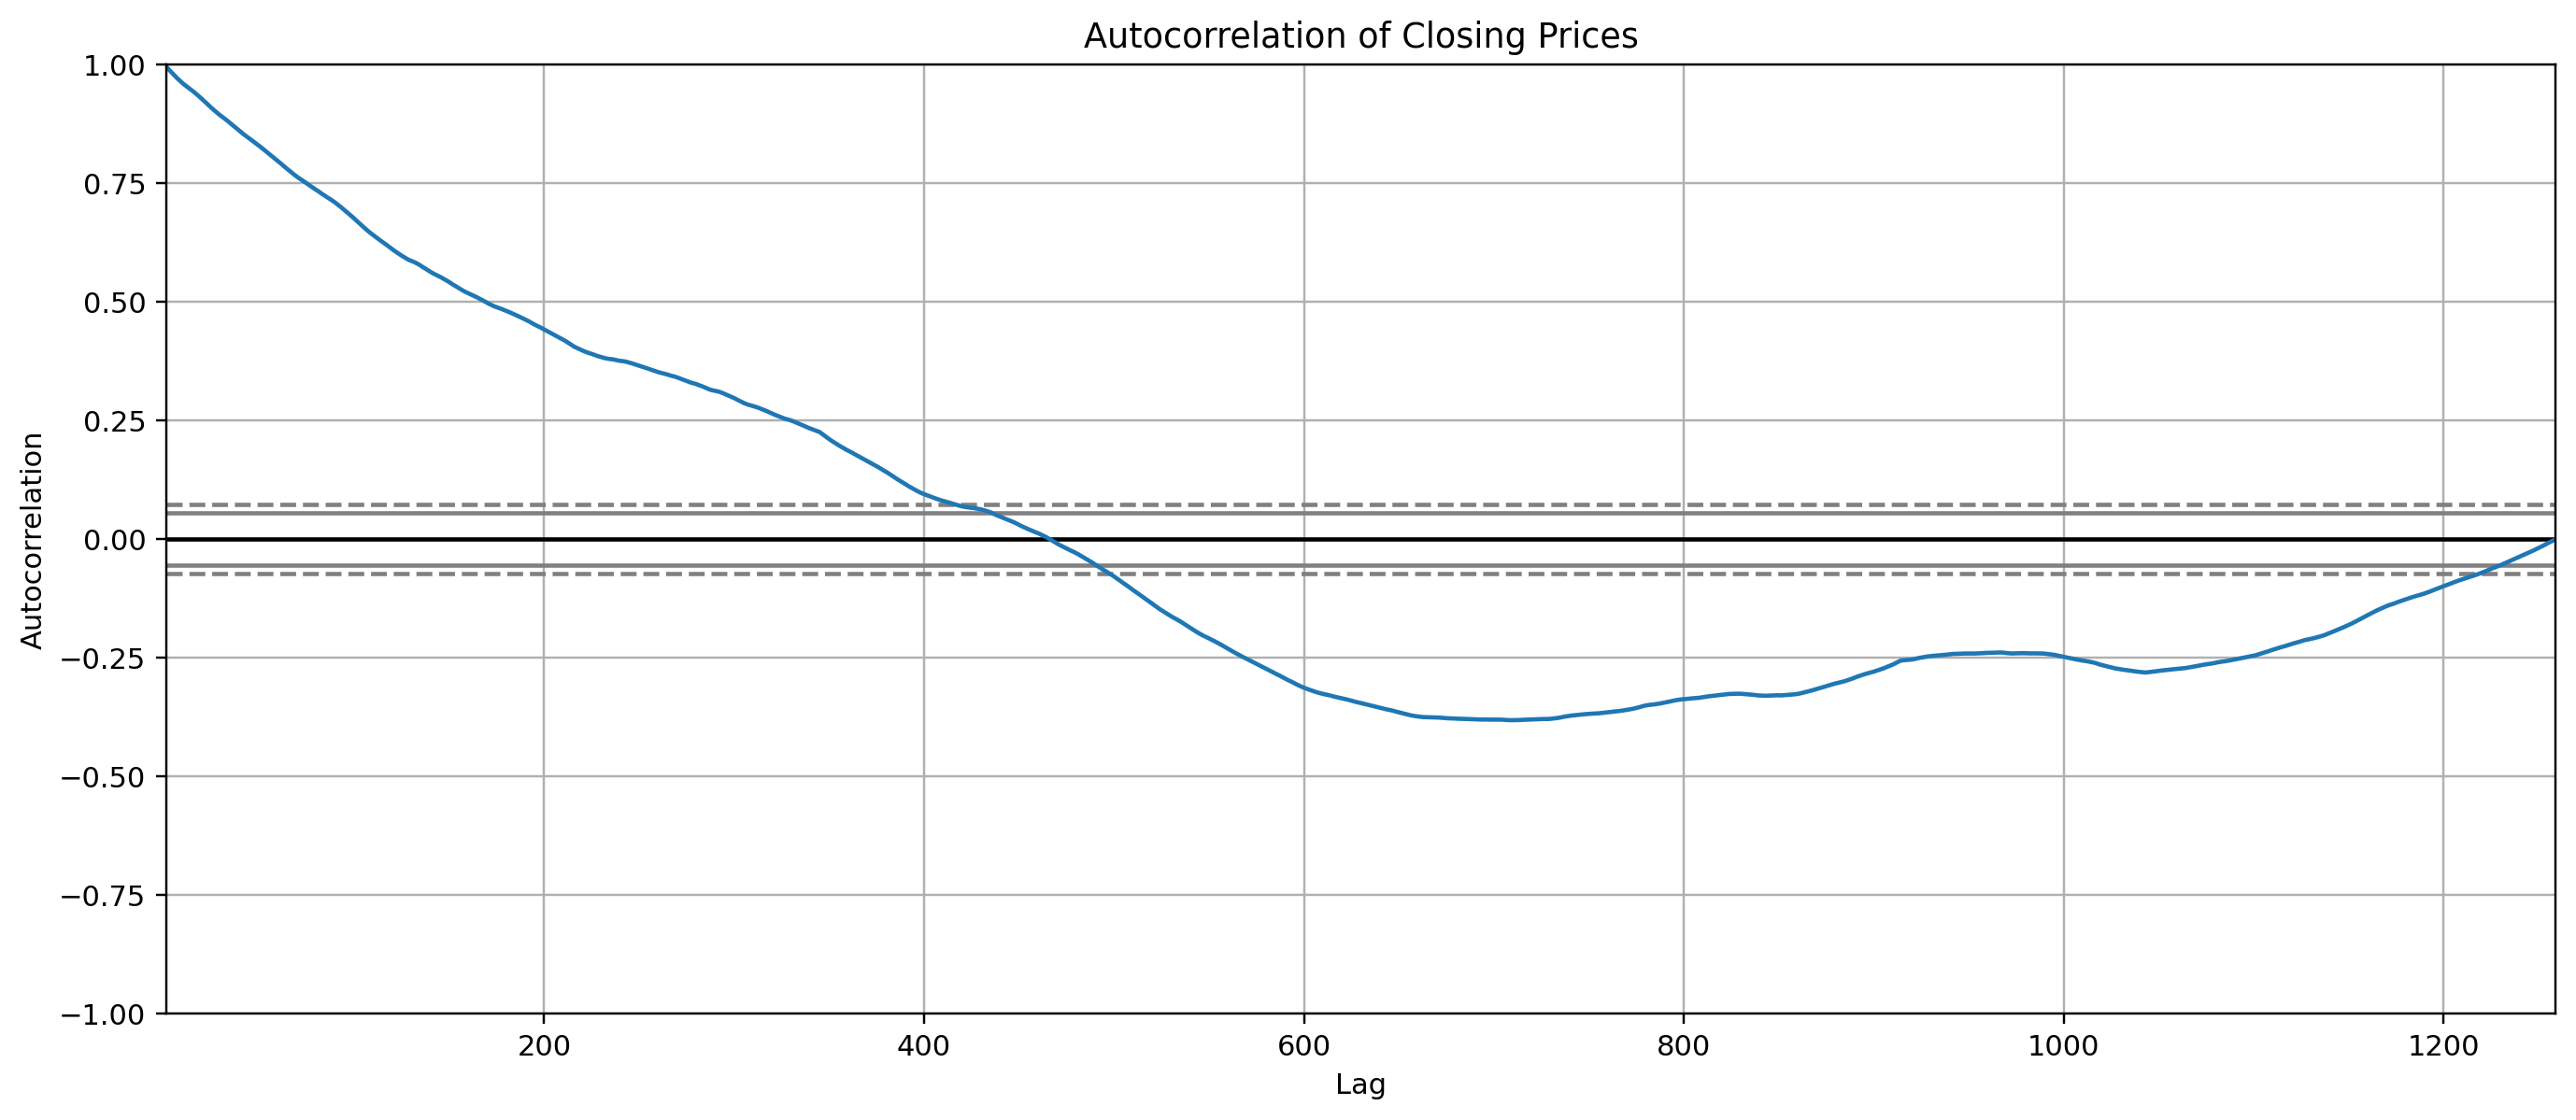

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'FB.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

data.set_index('Date', inplace=True)

data.index = pd.to_datetime(data.index)

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 220})
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation of Closing Prices')
plt.show()

Seasonal Decompose

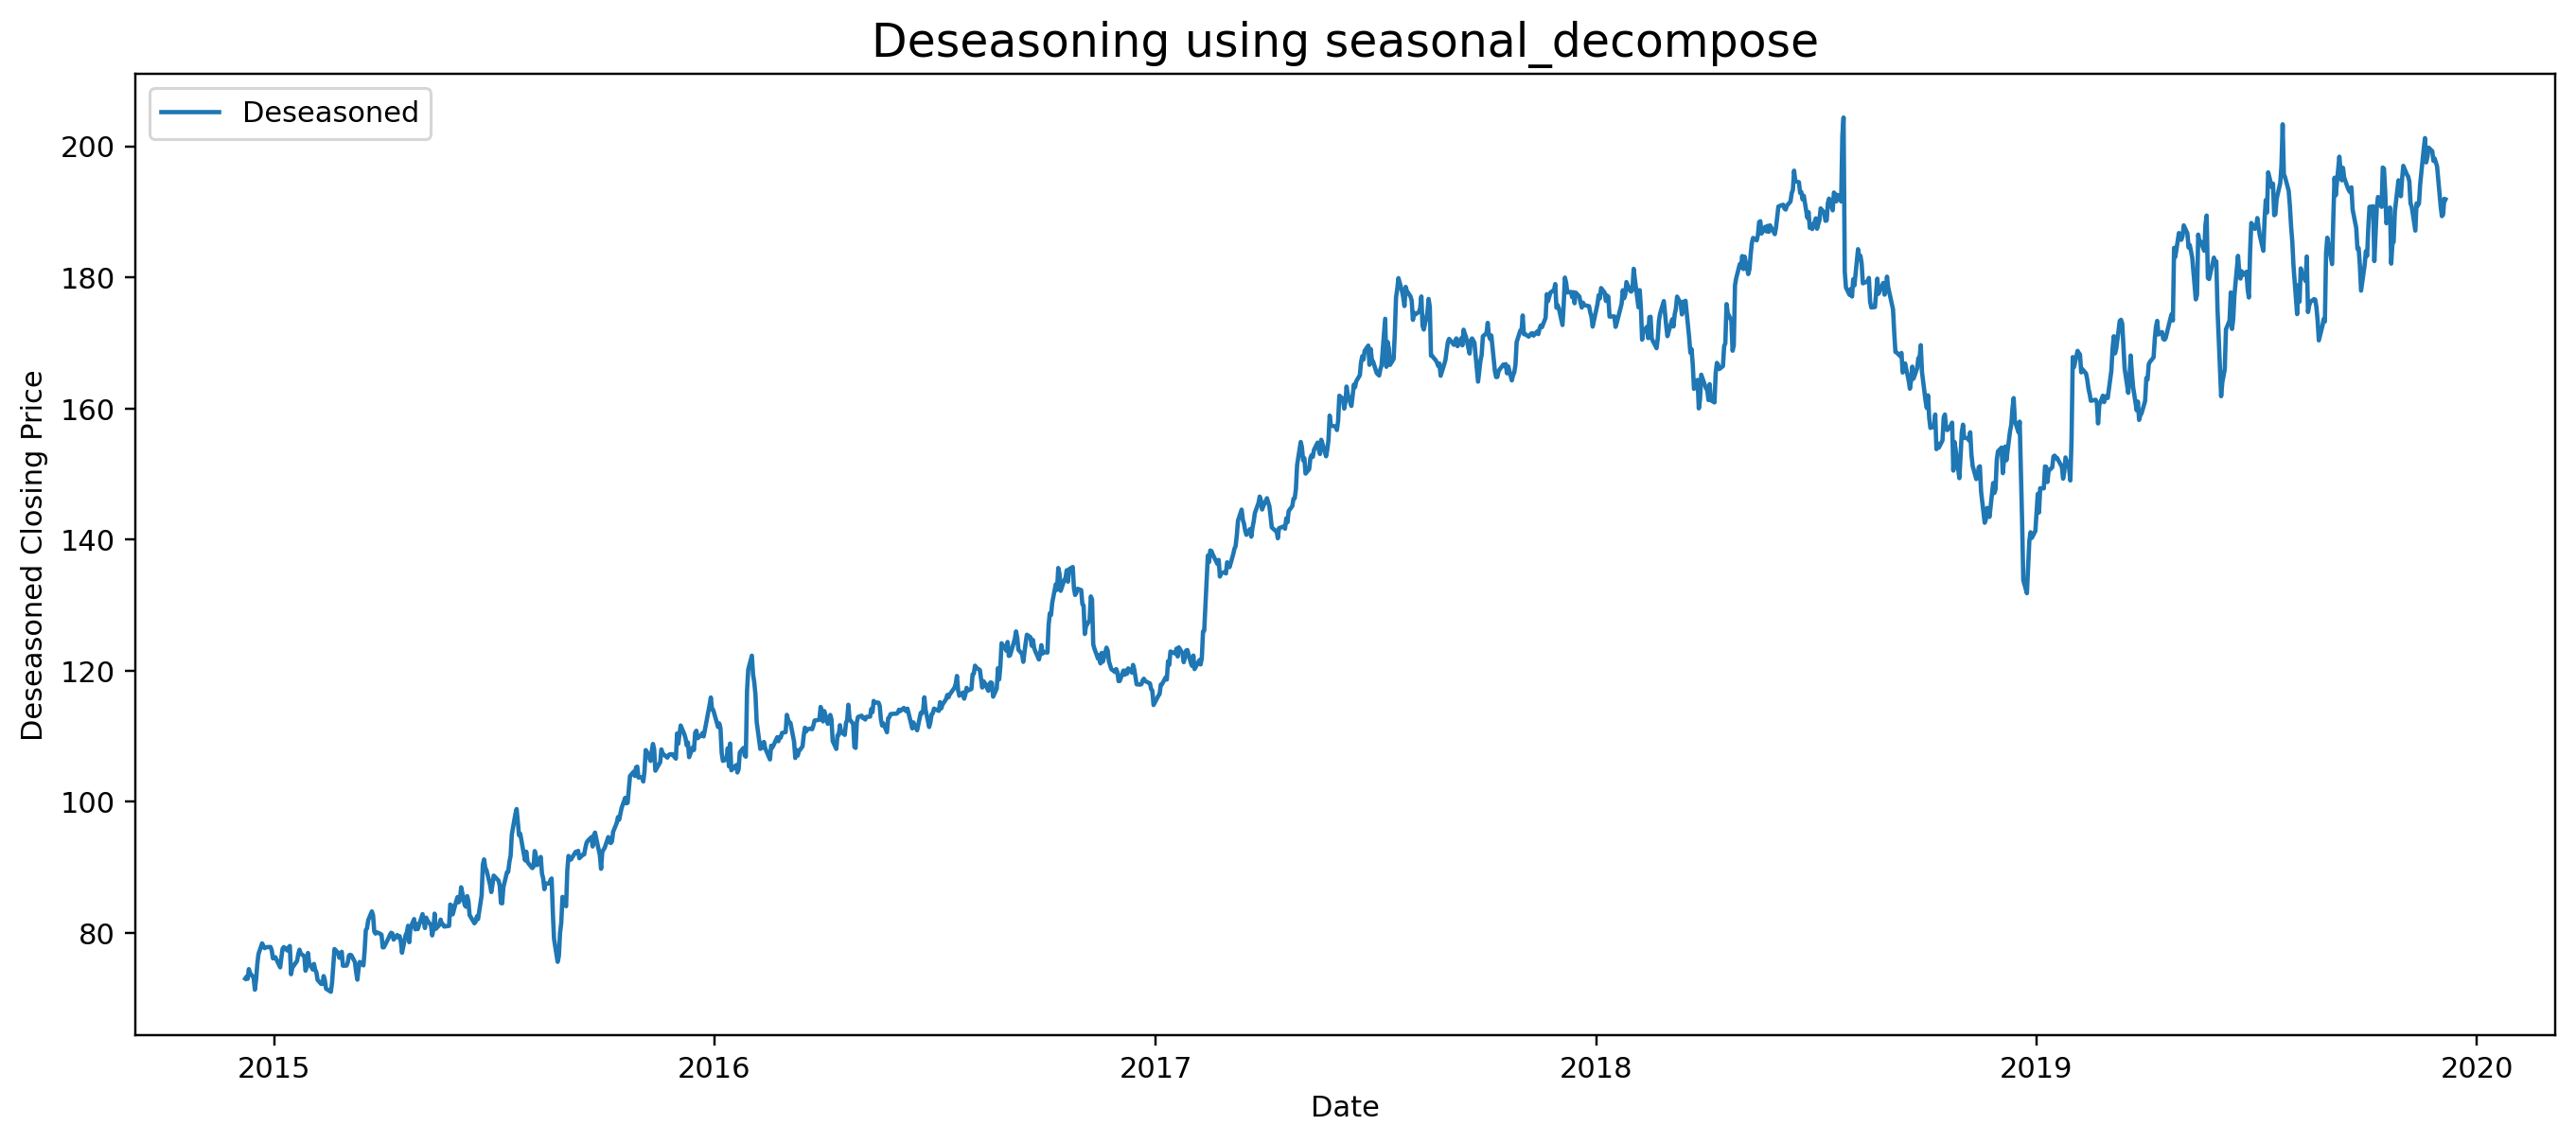

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

file_path = 'FB.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

data.set_index('Date', inplace=True)

data.index = pd.to_datetime(data.index)

result_mul = seasonal_decompose(data['Close'], model='multiplicative', period=365)

deseason = data['Close'] / result_mul.seasonal

plt.figure(figsize=(15, 6))
plt.plot(deseason, label='Deseasoned')
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Deseasoned Closing Price')
plt.legend()
plt.show()

<Figure size 3300x2200 with 0 Axes>

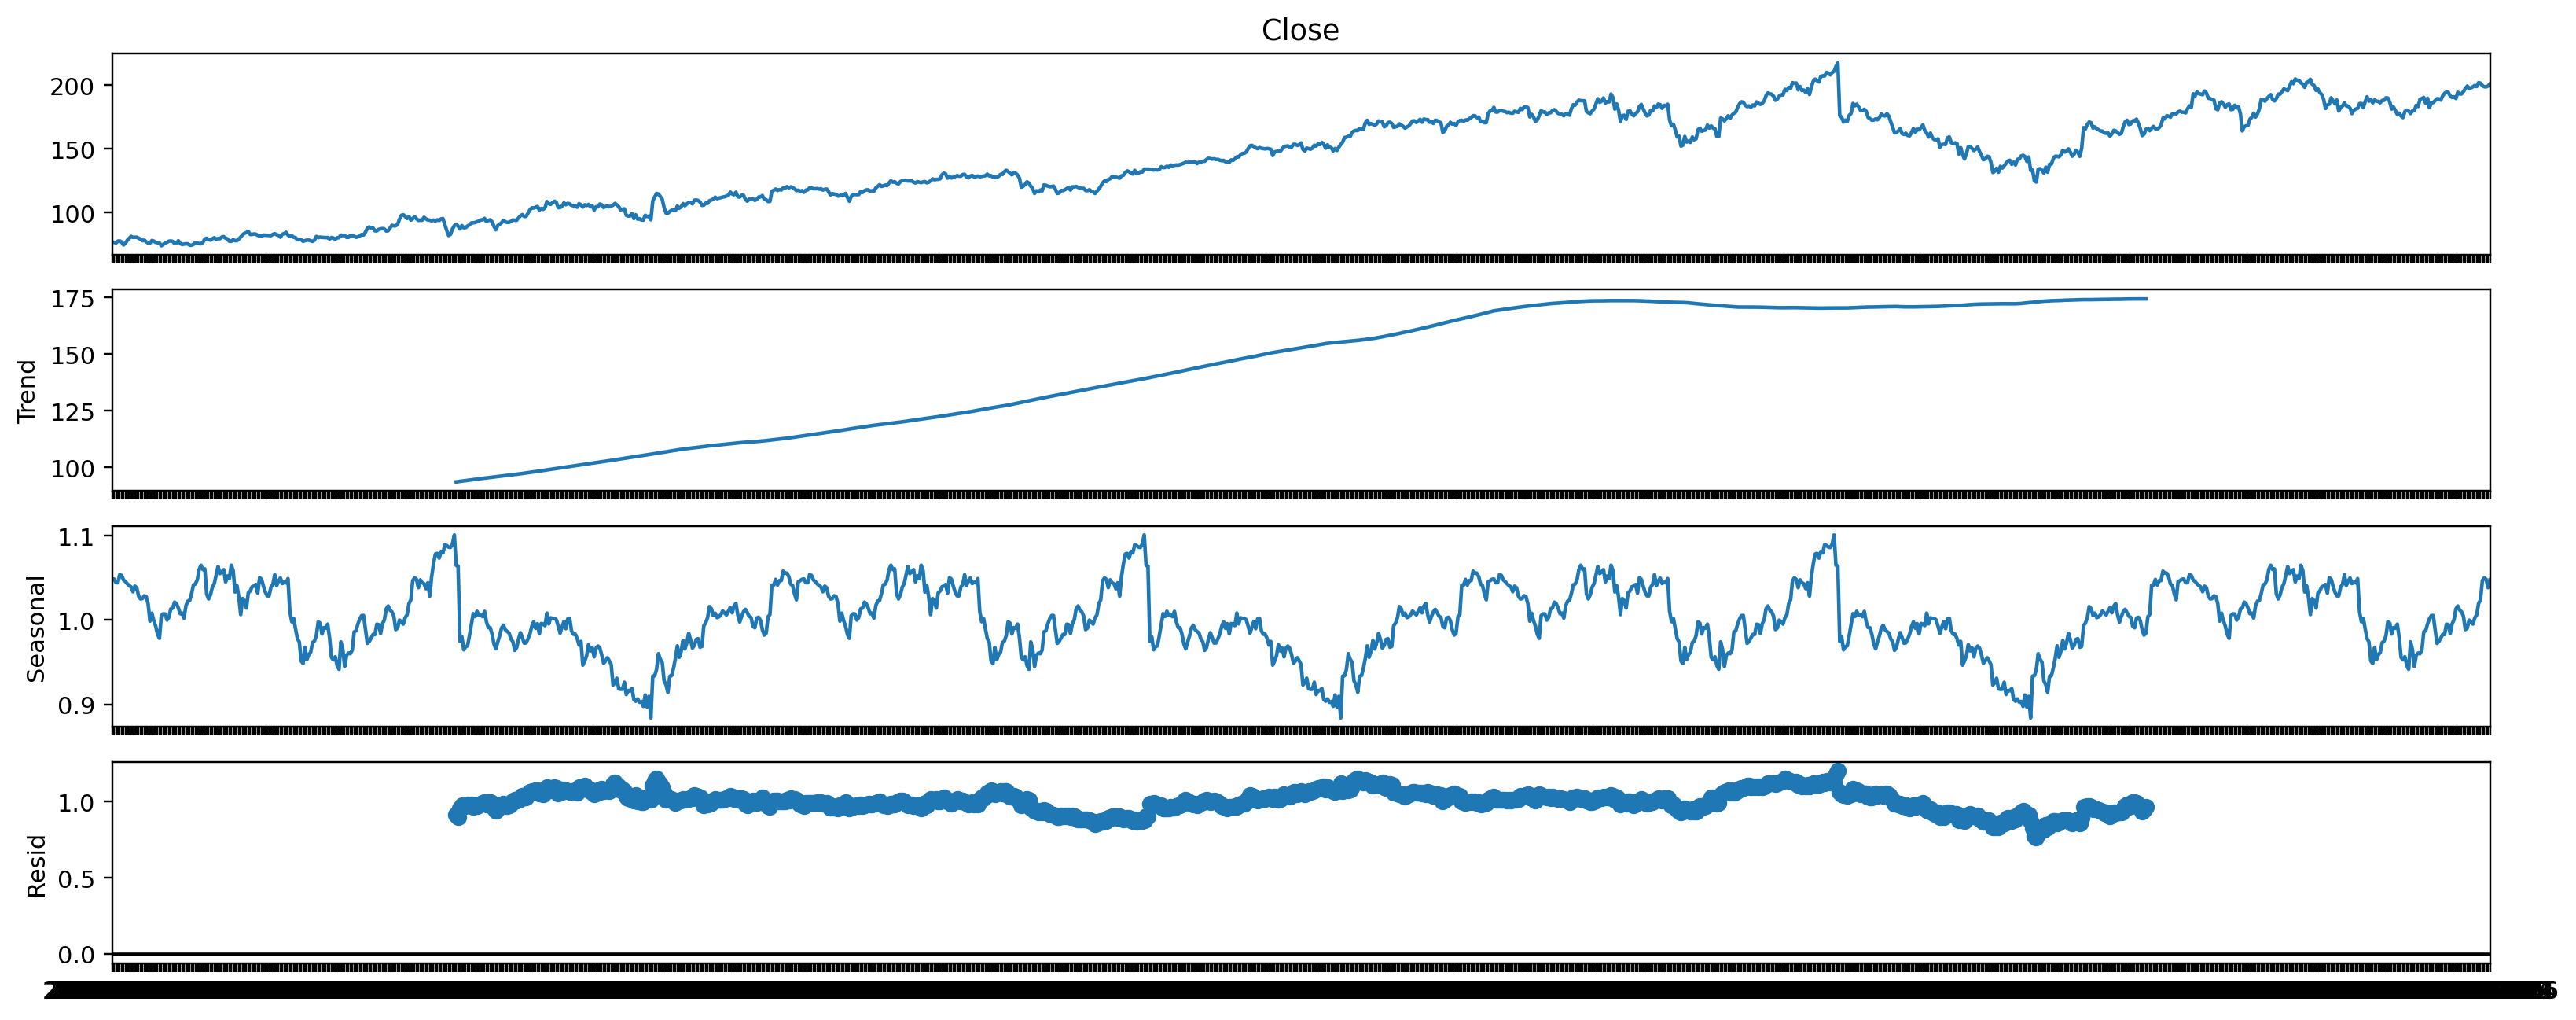

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv(r'FB.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')

result = seasonal_decompose(df['Close'], model='multiplicative', period=365)

plt.figure(figsize=(15, 10))
result.plot()
plt.show()


Ice Cream vs Heater Dataset


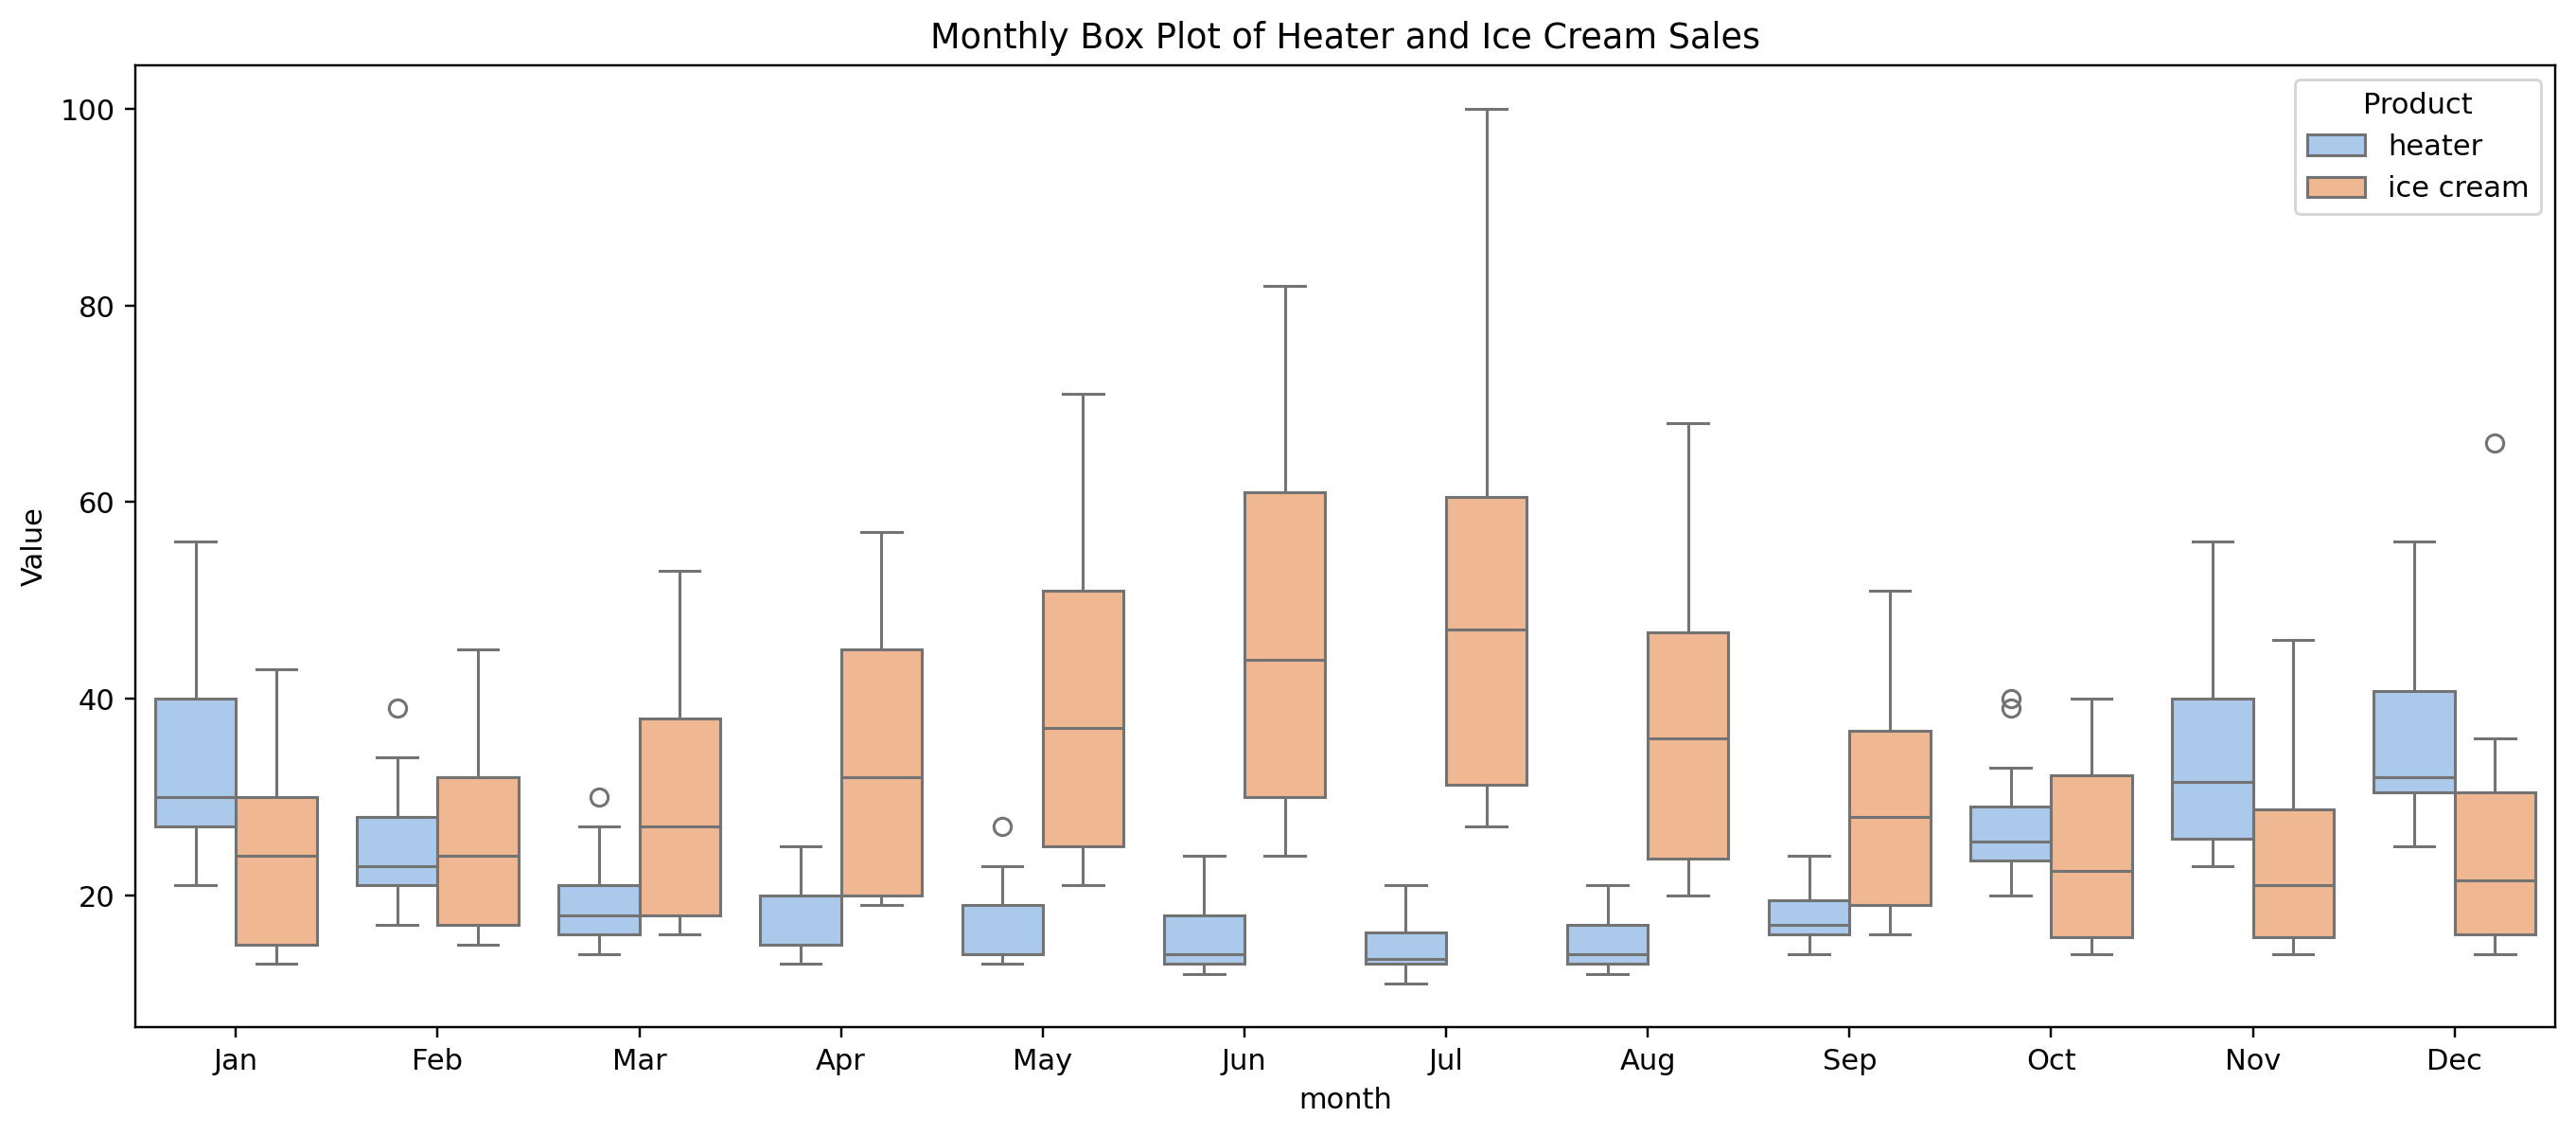

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=['Month'], infer_datetime_format=True)

df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df['month'] = df['Month'].dt.strftime('%b')
df['year'] = df['Month'].dt.year

df_melted = df.melt(id_vars=['month', 'year'], value_vars=['heater', 'ice cream'],
                     var_name='Product', value_name='Value')

plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='Value', hue='Product', data=df_melted, palette='pastel')
plt.title("Monthly Box Plot of Heater and Ice Cream Sales")
plt.show()


Month        datetime64[ns]
heater                int64
ice cream             int64
dtype: object
DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='Month', length=198, freq=None)


<Figure size 2640x1320 with 0 Axes>

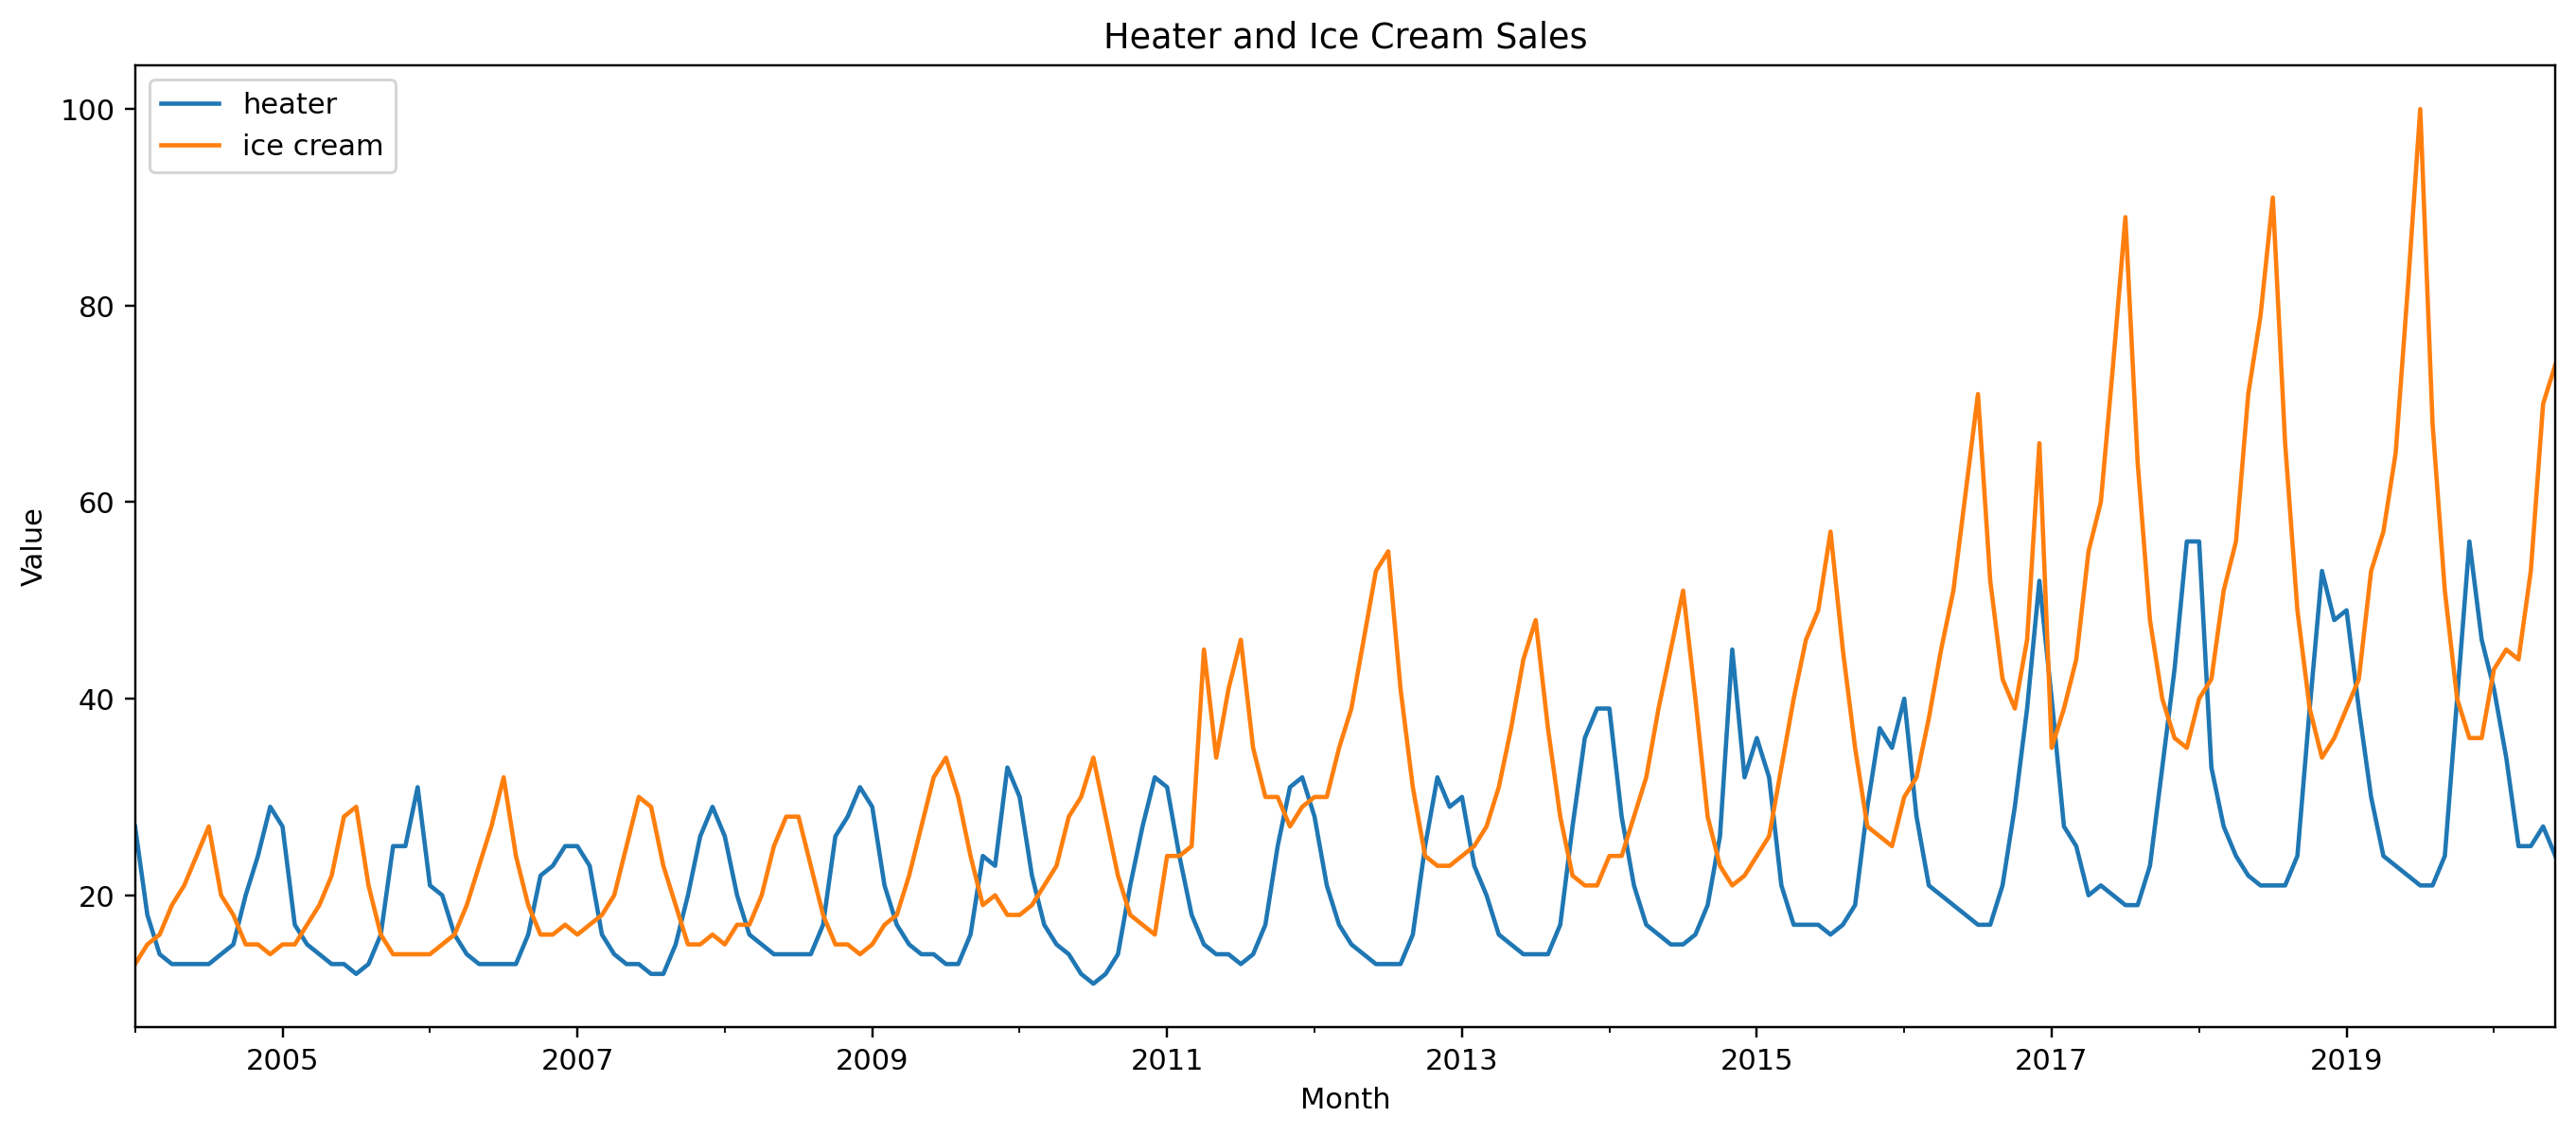

ValueError: If using all scalar values, you must pass an index

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'ice_cream_vs_heater.csv'
data = pd.read_csv(file_path, parse_dates=['Month'], dayfirst=True)

print(data.dtypes)

data.set_index('Month', inplace=True)

print(data.index)

plt.figure(figsize=(12, 6))
data.plot()
plt.ylabel('Value')
plt.title('Heater and Ice Cream Sales')
plt.show()

if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

monthly_data = data.resample('M').mean()

months = monthly_data.groupby(monthly_data.index.month)
months_df = pd.DataFrame({i+1: months.get_group(i+1) for i in range(12)})

plt.figure(figsize=(12, 6))
months_df.boxplot()
plt.xlabel('Month')
plt.ylabel('Monthly Average Value')
plt.title('Monthly Boxplot of Heater and Ice Cream Sales')
plt.show()


AutoCorrelation Plot

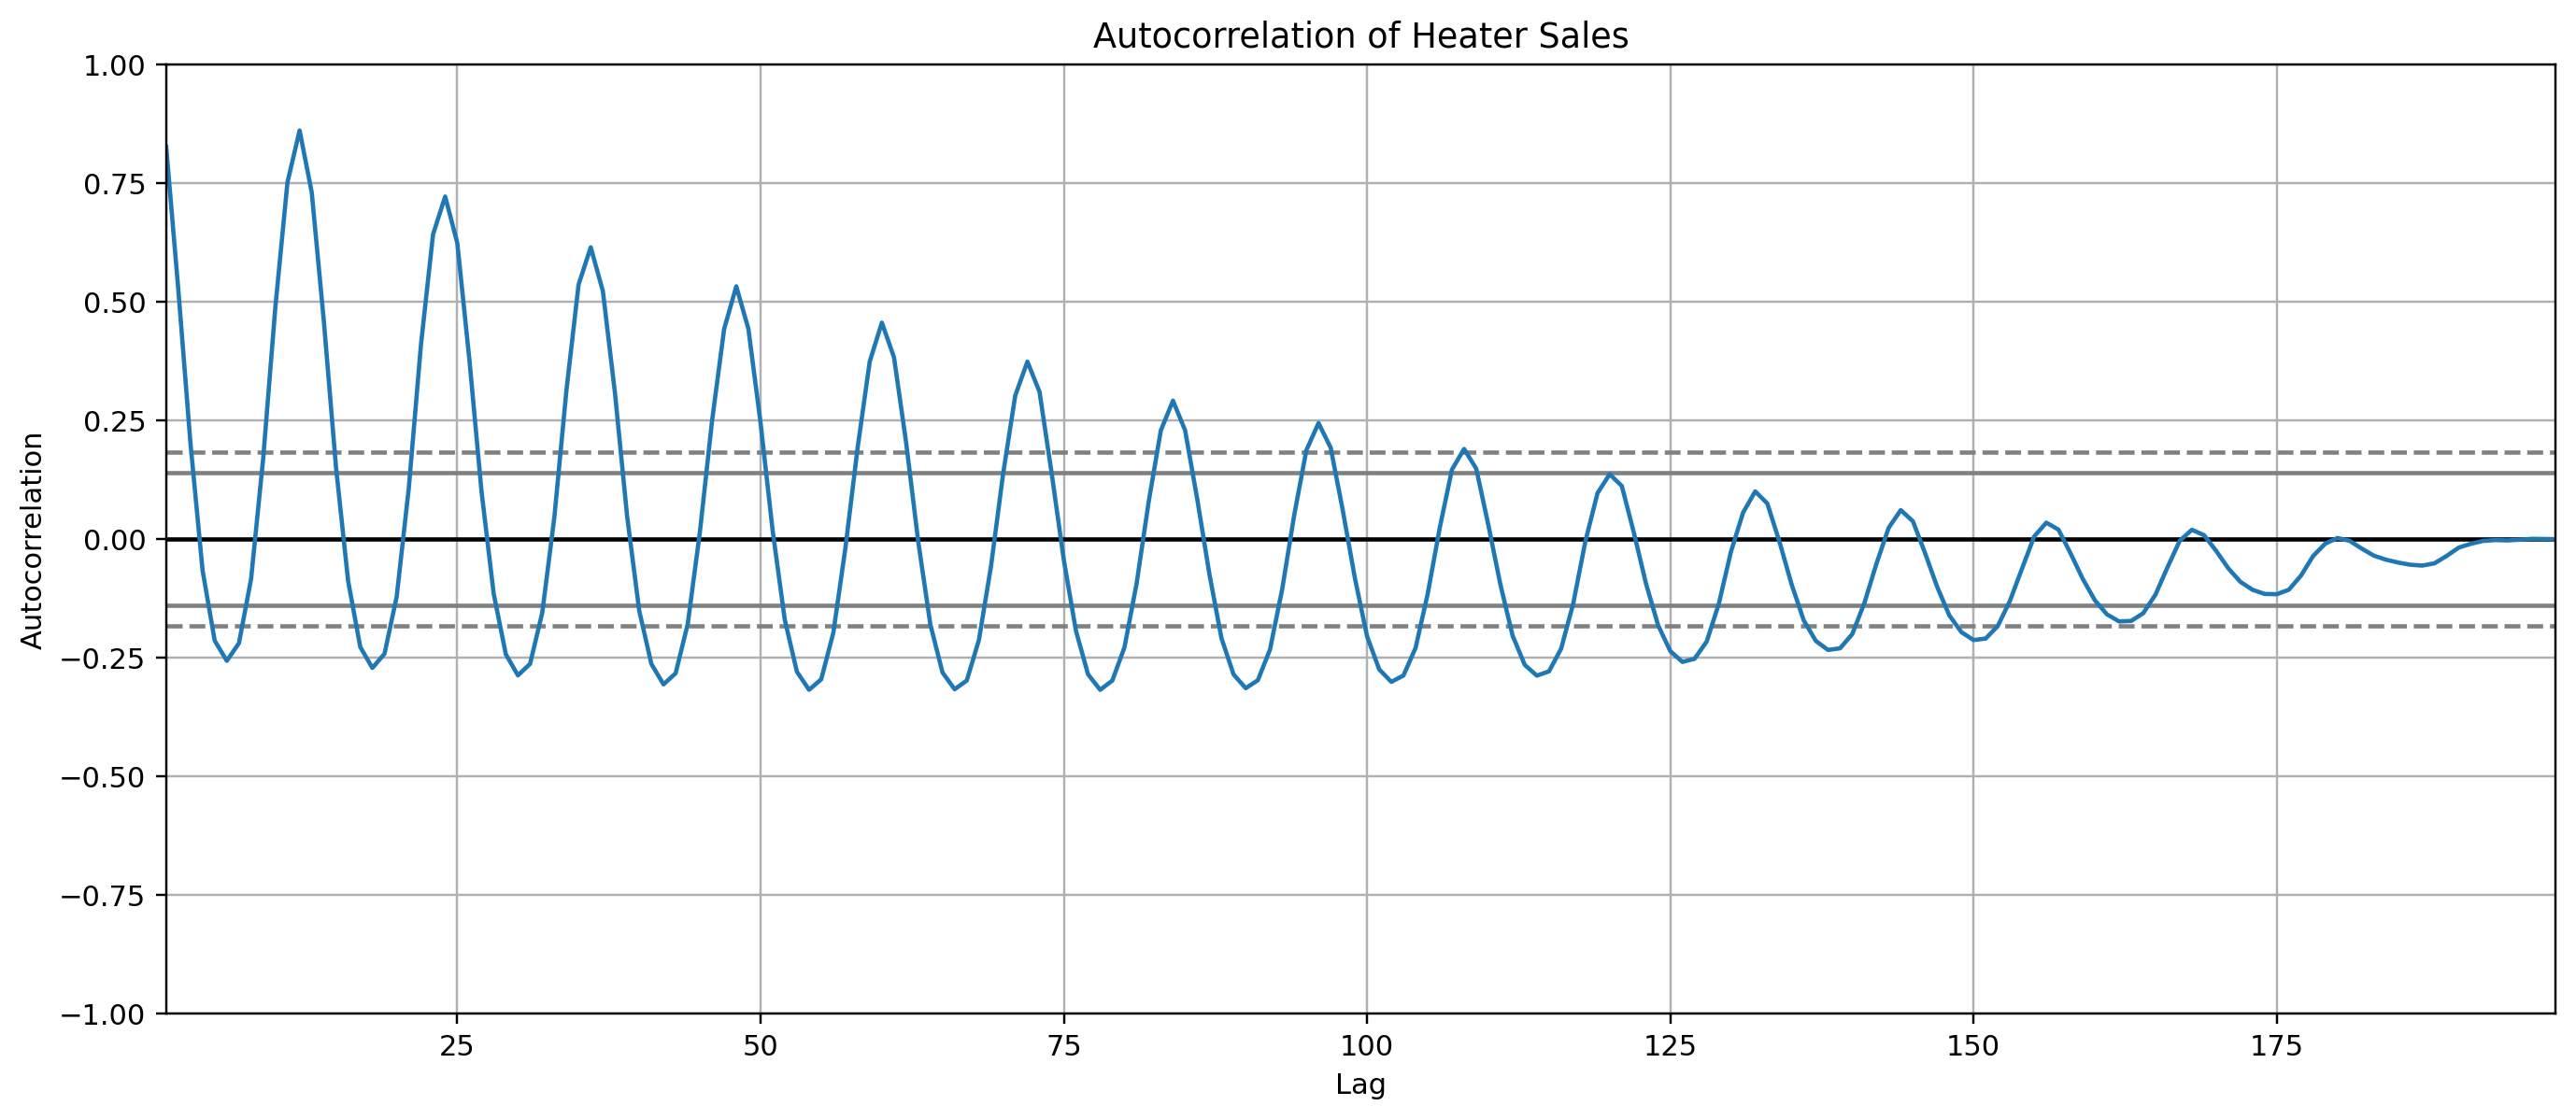

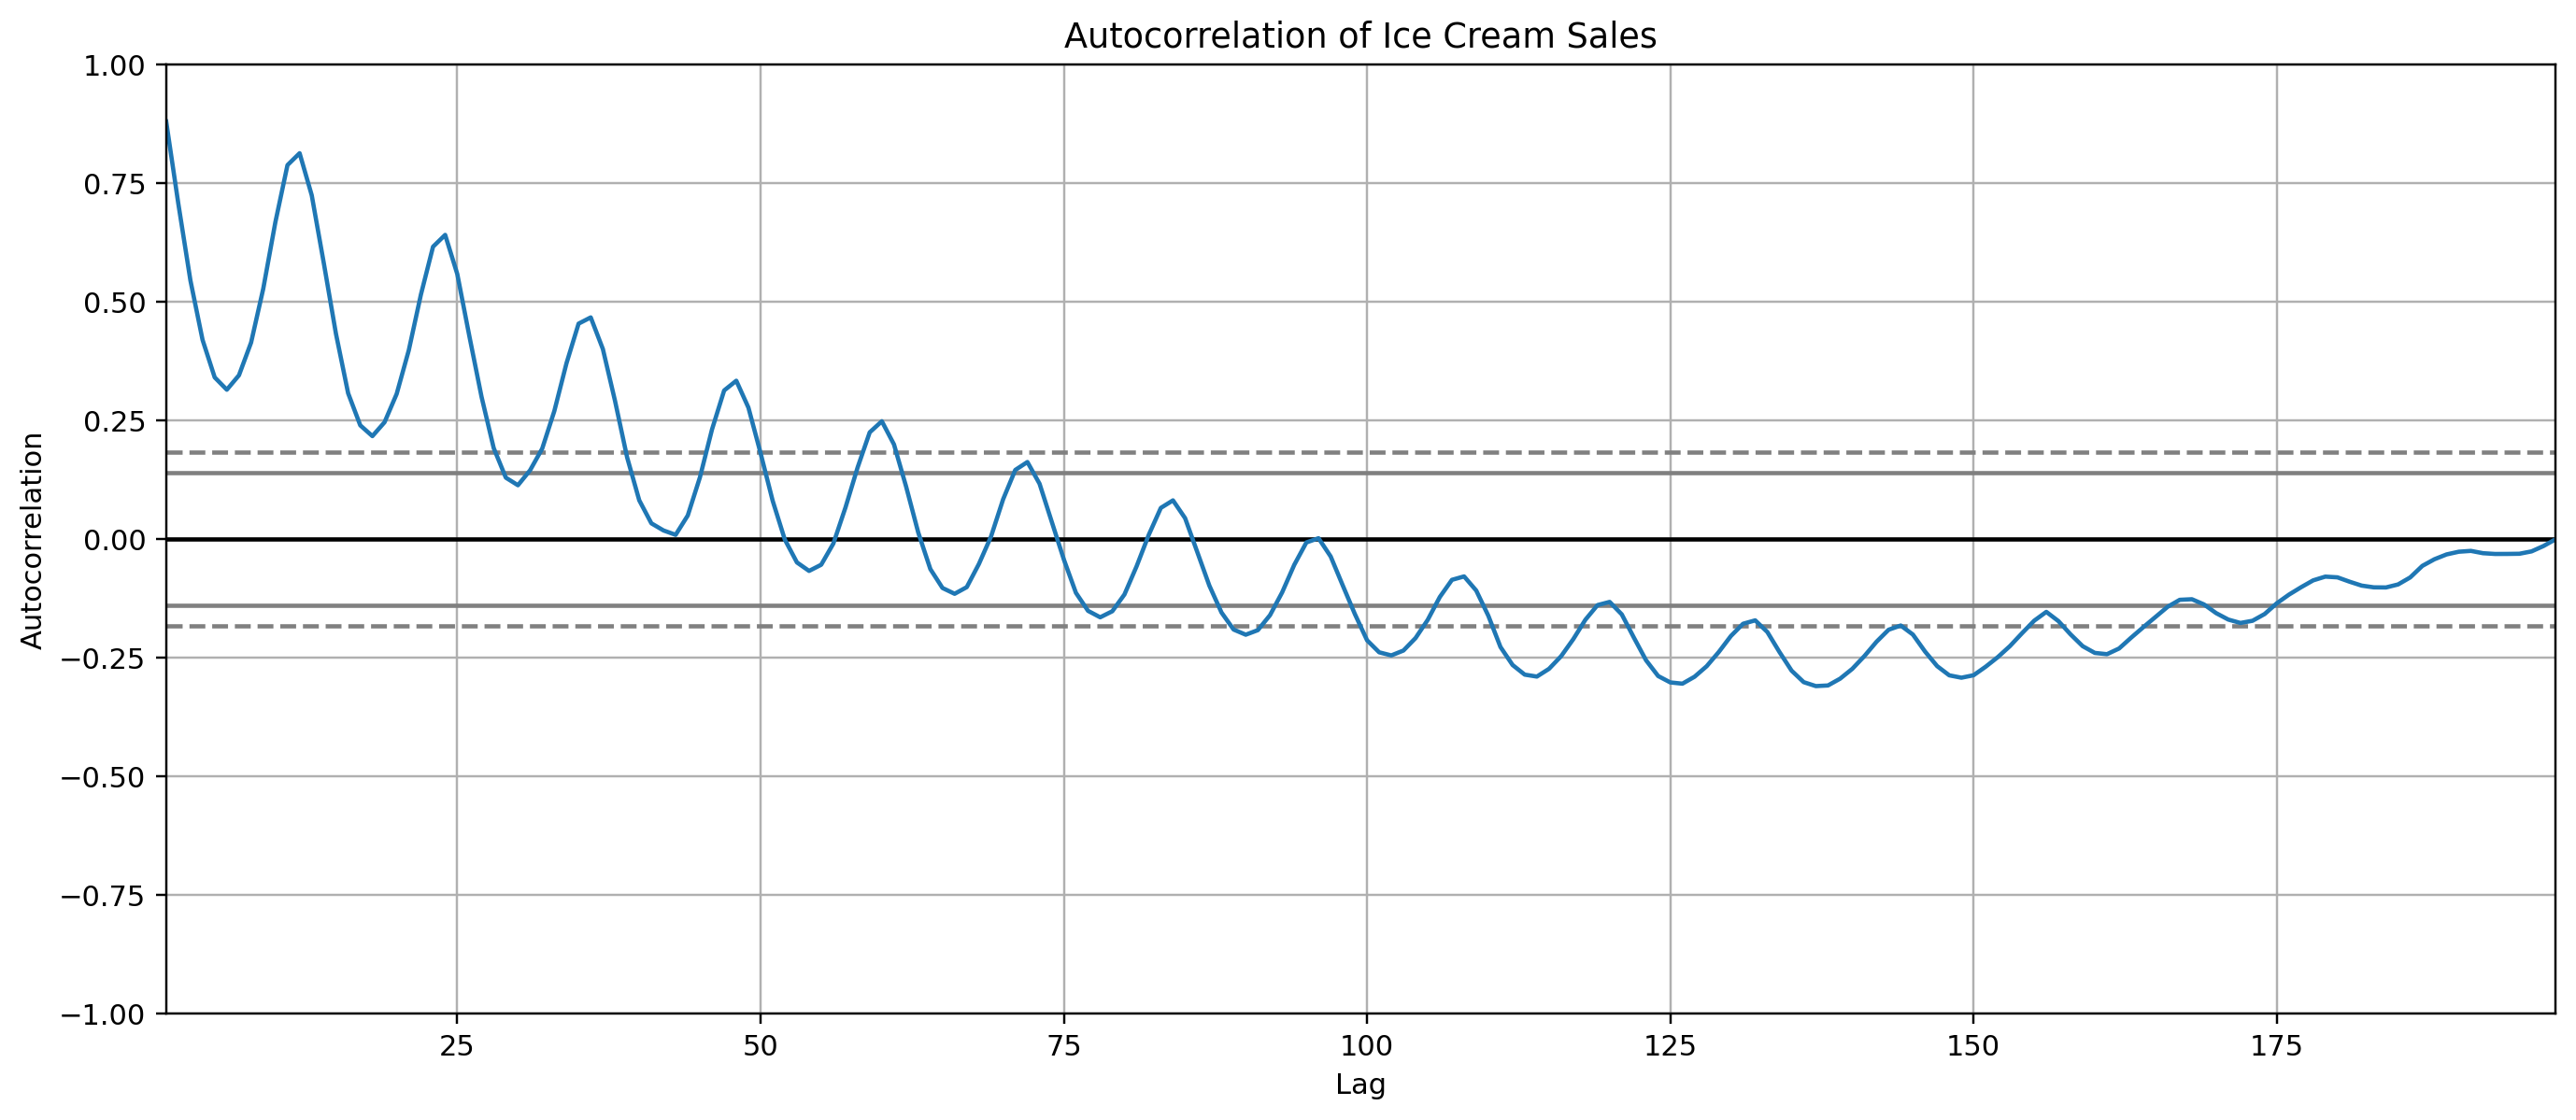

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'ice_cream_vs_heater.csv'
data = pd.read_csv(file_path, parse_dates=['Month'], dayfirst=True)

data.set_index('Month', inplace=True)

data.index = pd.to_datetime(data.index)

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 220})

plt.figure()
autocorrelation_plot(data['heater'])
plt.title('Autocorrelation of Heater Sales')
plt.show()

plt.figure()
autocorrelation_plot(data['ice cream'])
plt.title('Autocorrelation of Ice Cream Sales')
plt.show()


Seasonal Decompose

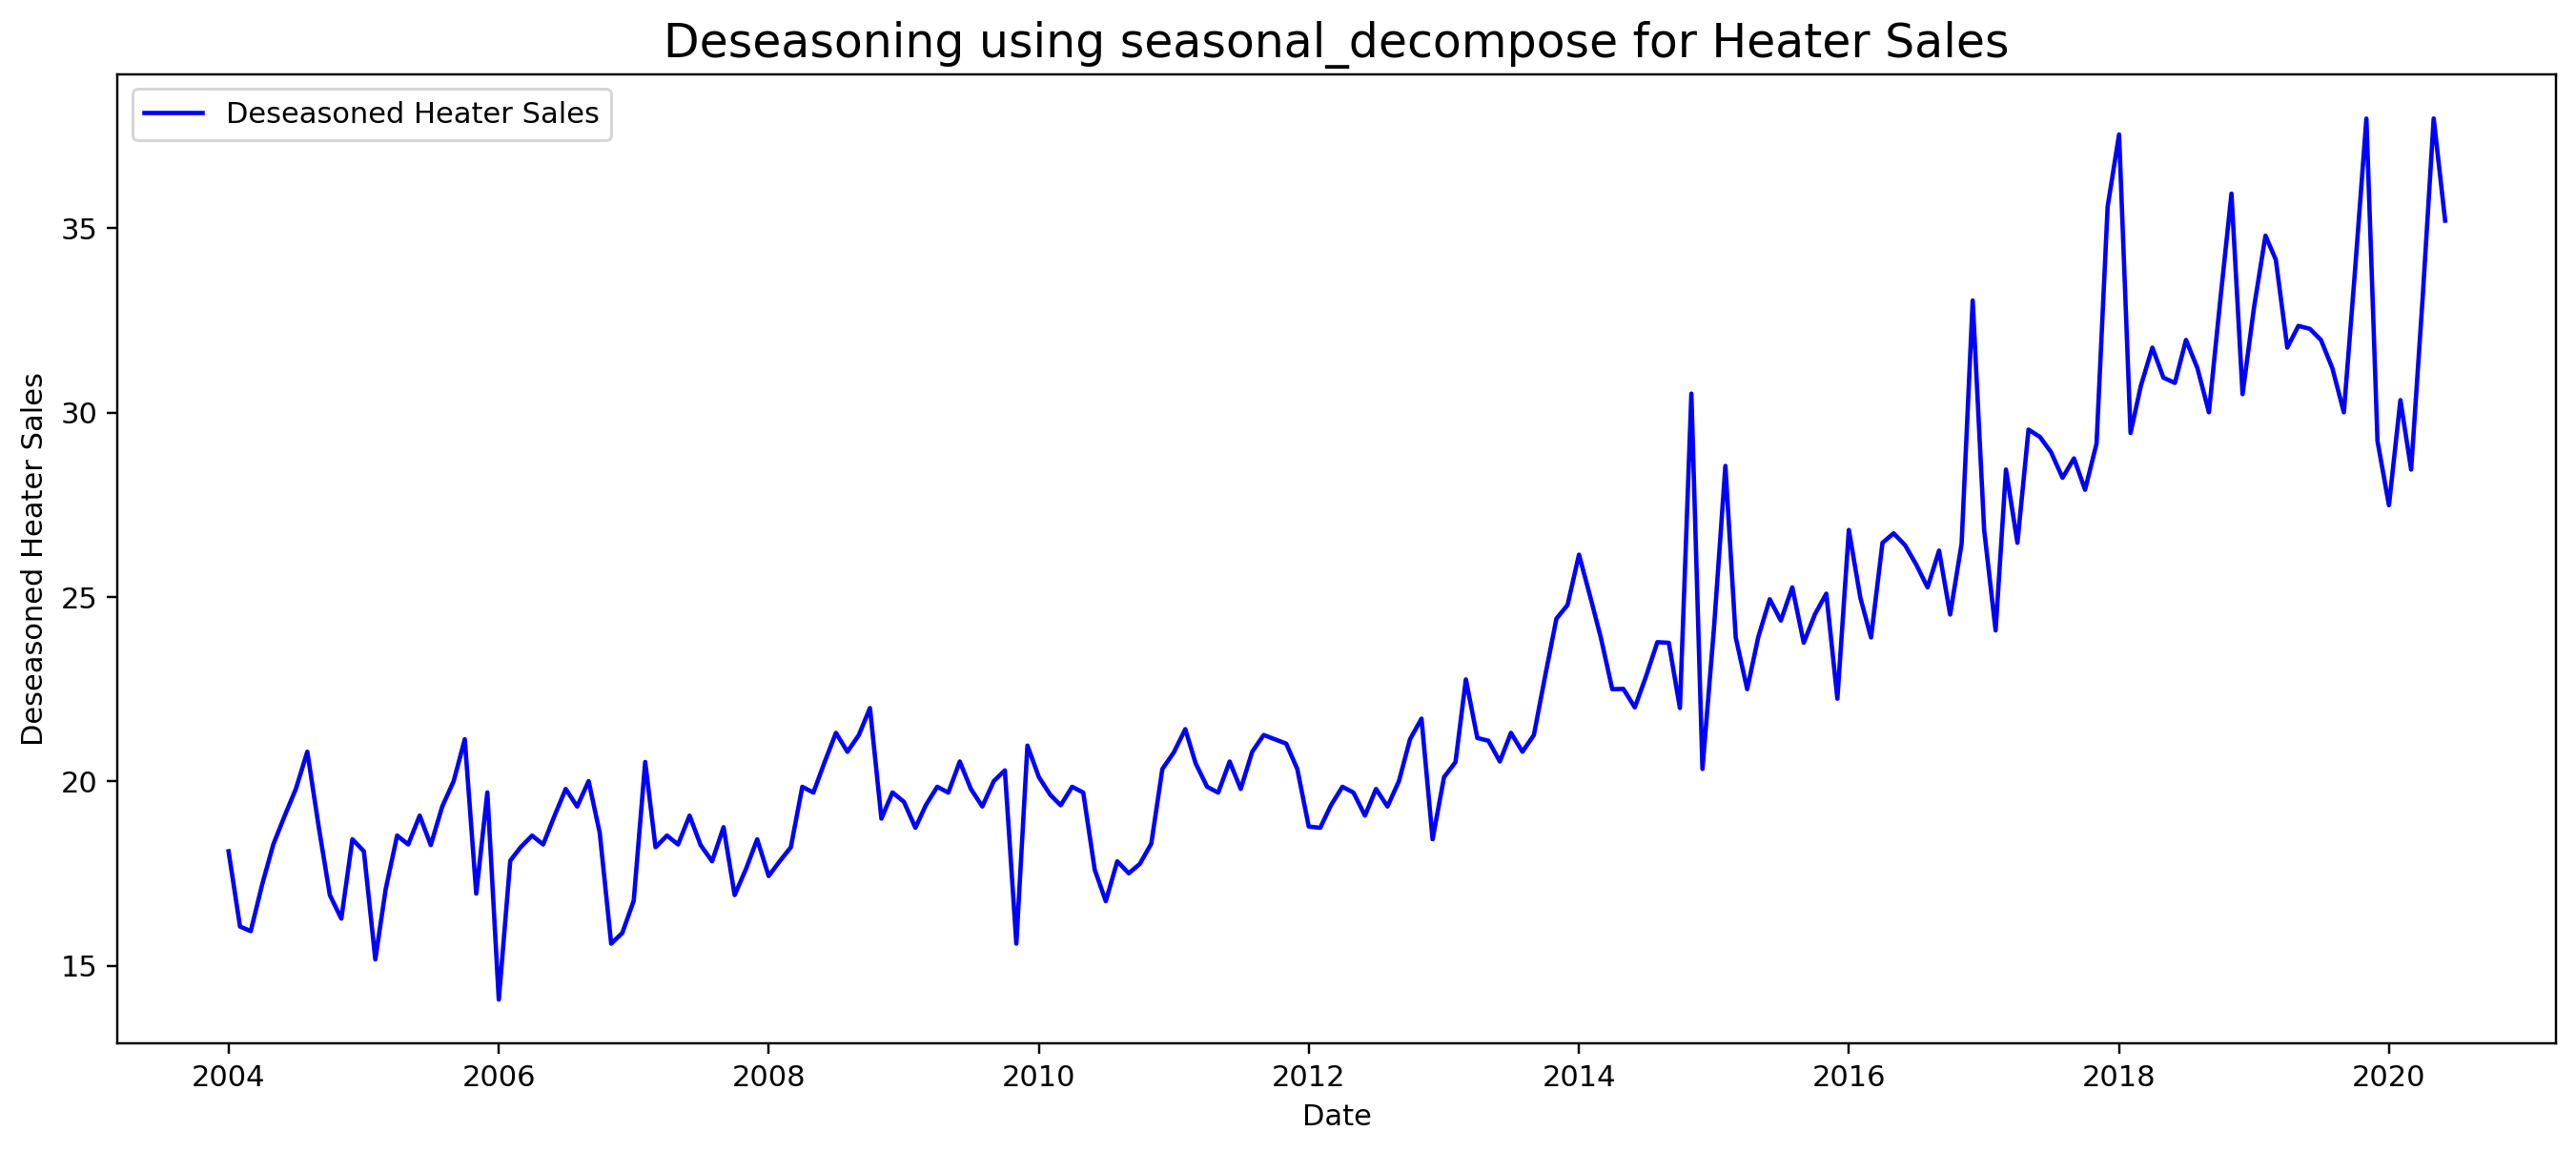

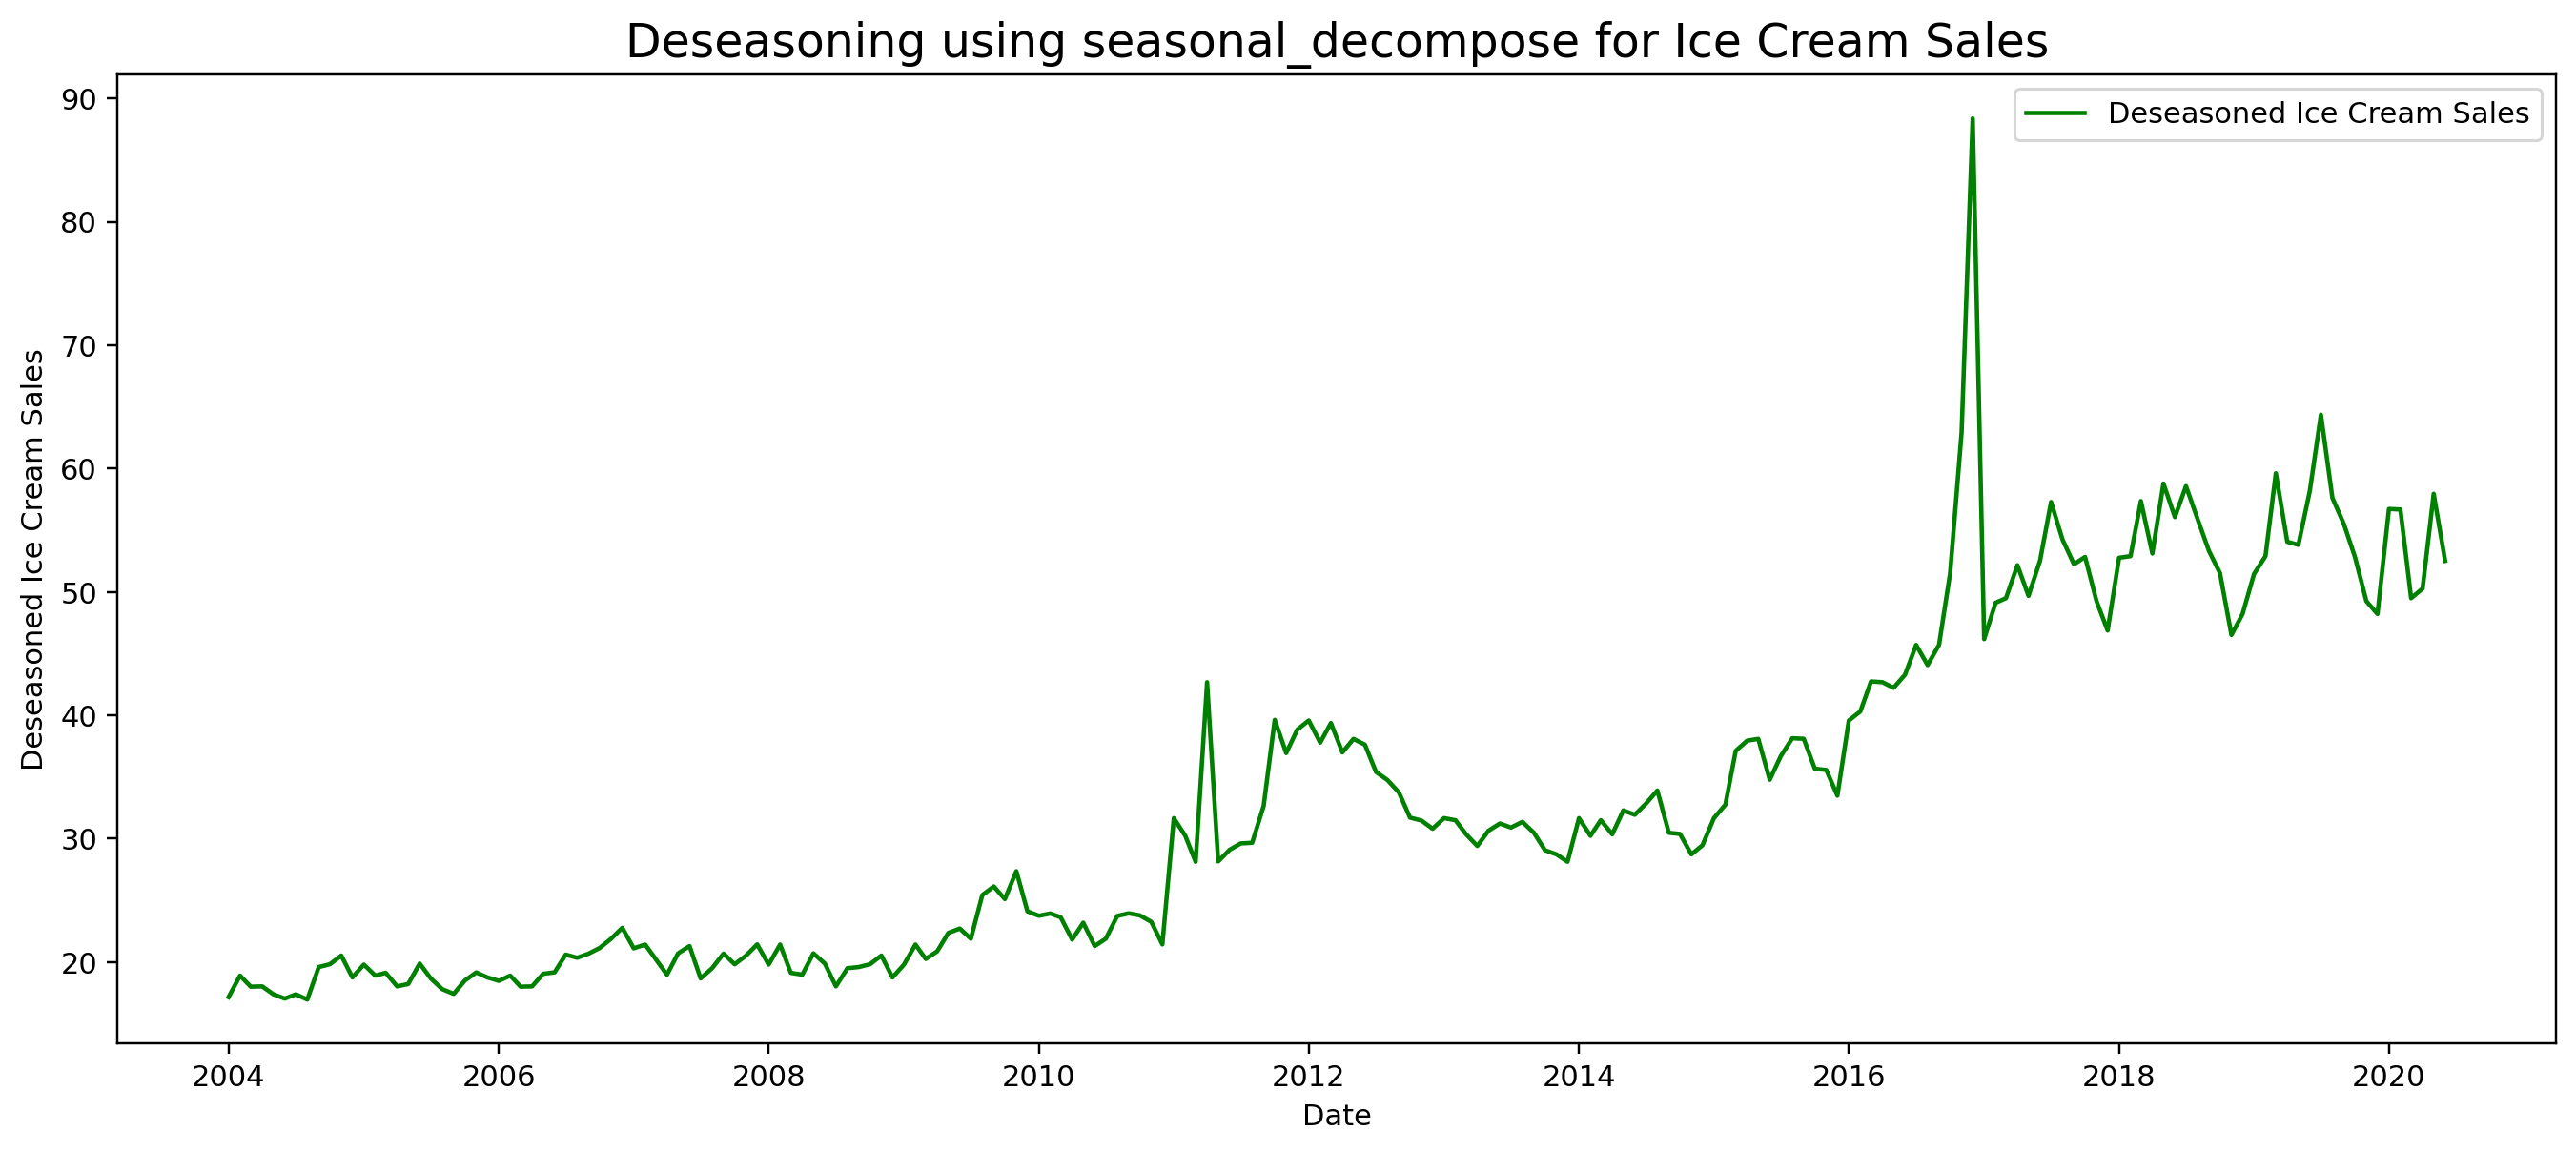

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

file_path = 'ice_cream_vs_heater.csv'
data = pd.read_csv(file_path, parse_dates=['Month'], dayfirst=True)

data.set_index('Month', inplace=True)

data.index = pd.to_datetime(data.index)

result_mul_heater = seasonal_decompose(data['heater'], model='multiplicative', period=12)
deseason_heater = data['heater'] / result_mul_heater.seasonal

result_mul_ice_cream = seasonal_decompose(data['ice cream'], model='multiplicative', period=12)
deseason_ice_cream = data['ice cream'] / result_mul_ice_cream.seasonal

plt.figure(figsize=(15, 6))
plt.plot(deseason_heater, label='Deseasoned Heater Sales', color='blue')
plt.title('Deseasoning using seasonal_decompose for Heater Sales', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Deseasoned Heater Sales')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(deseason_ice_cream, label='Deseasoned Ice Cream Sales', color='green')
plt.title('Deseasoning using seasonal_decompose for Ice Cream Sales', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Deseasoned Ice Cream Sales')
plt.legend()
plt.show()


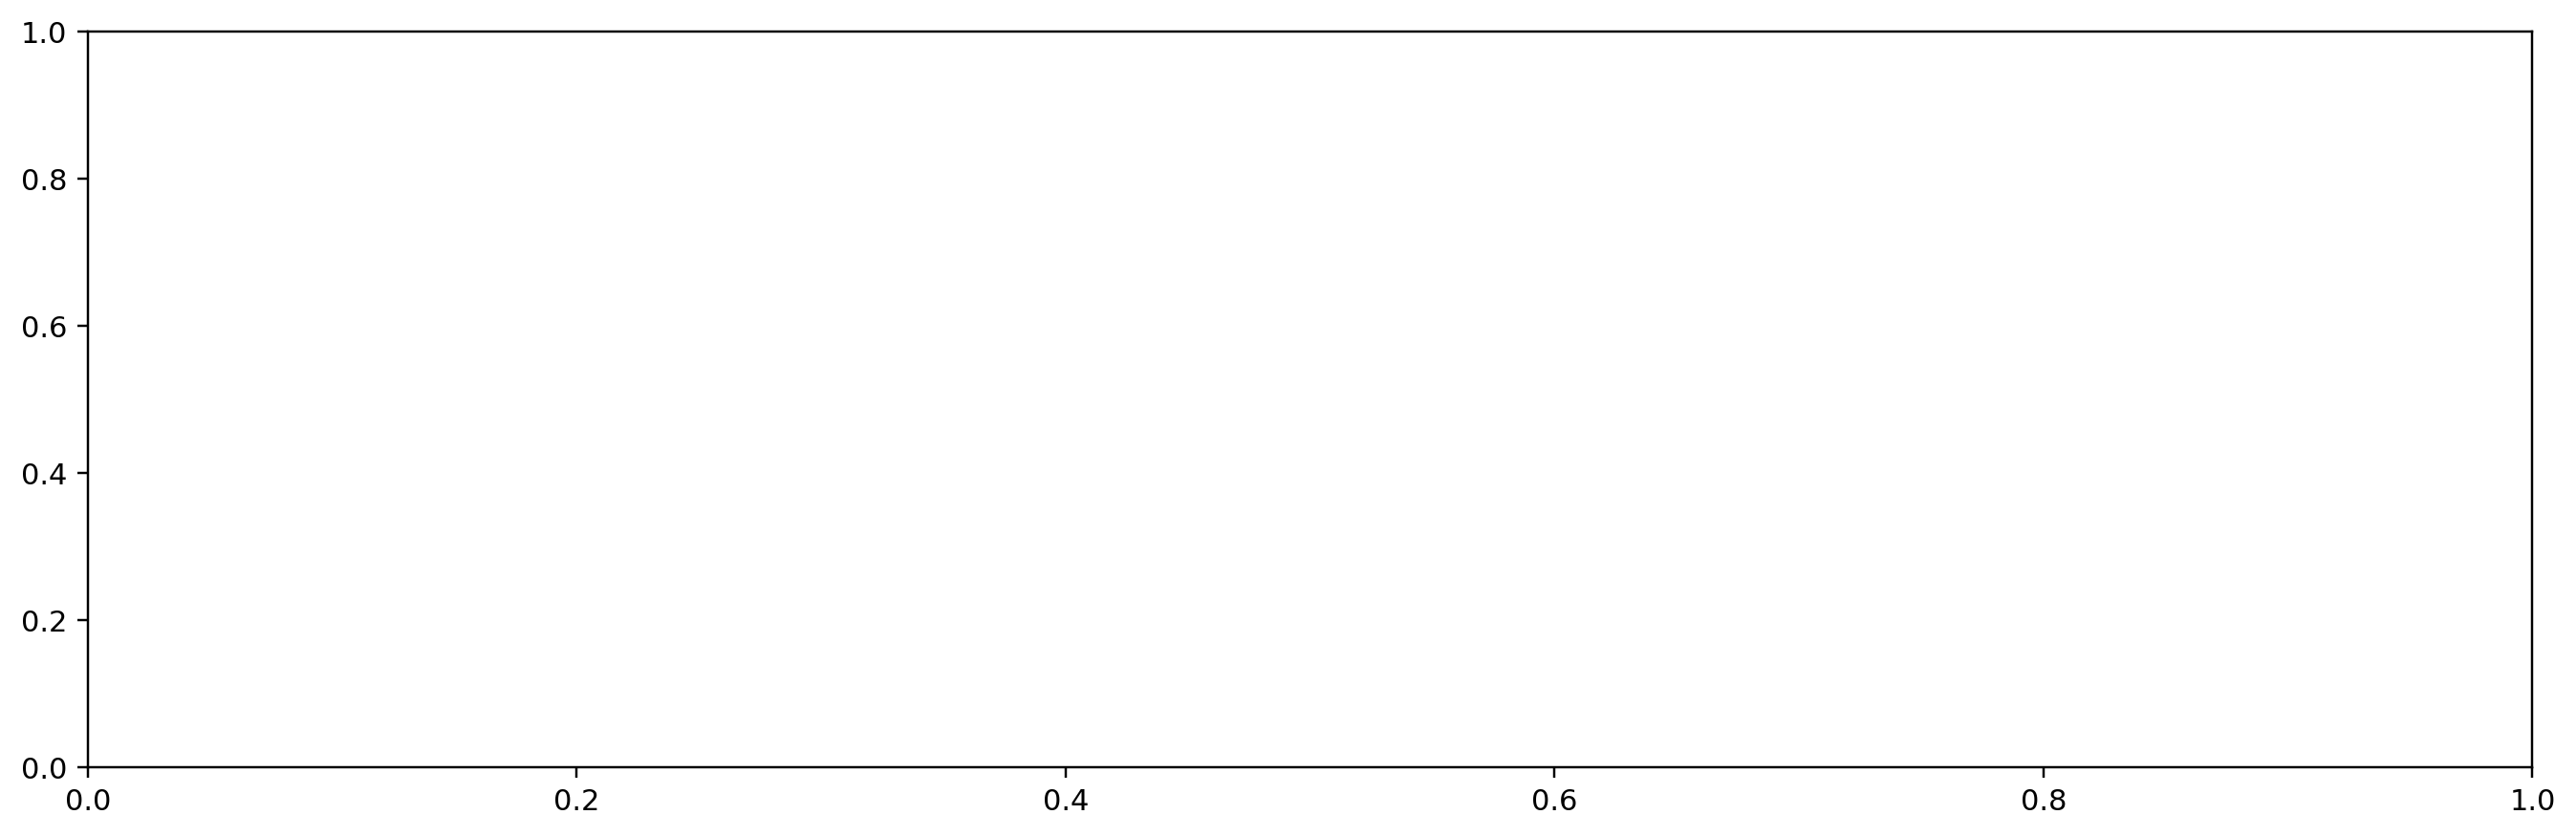

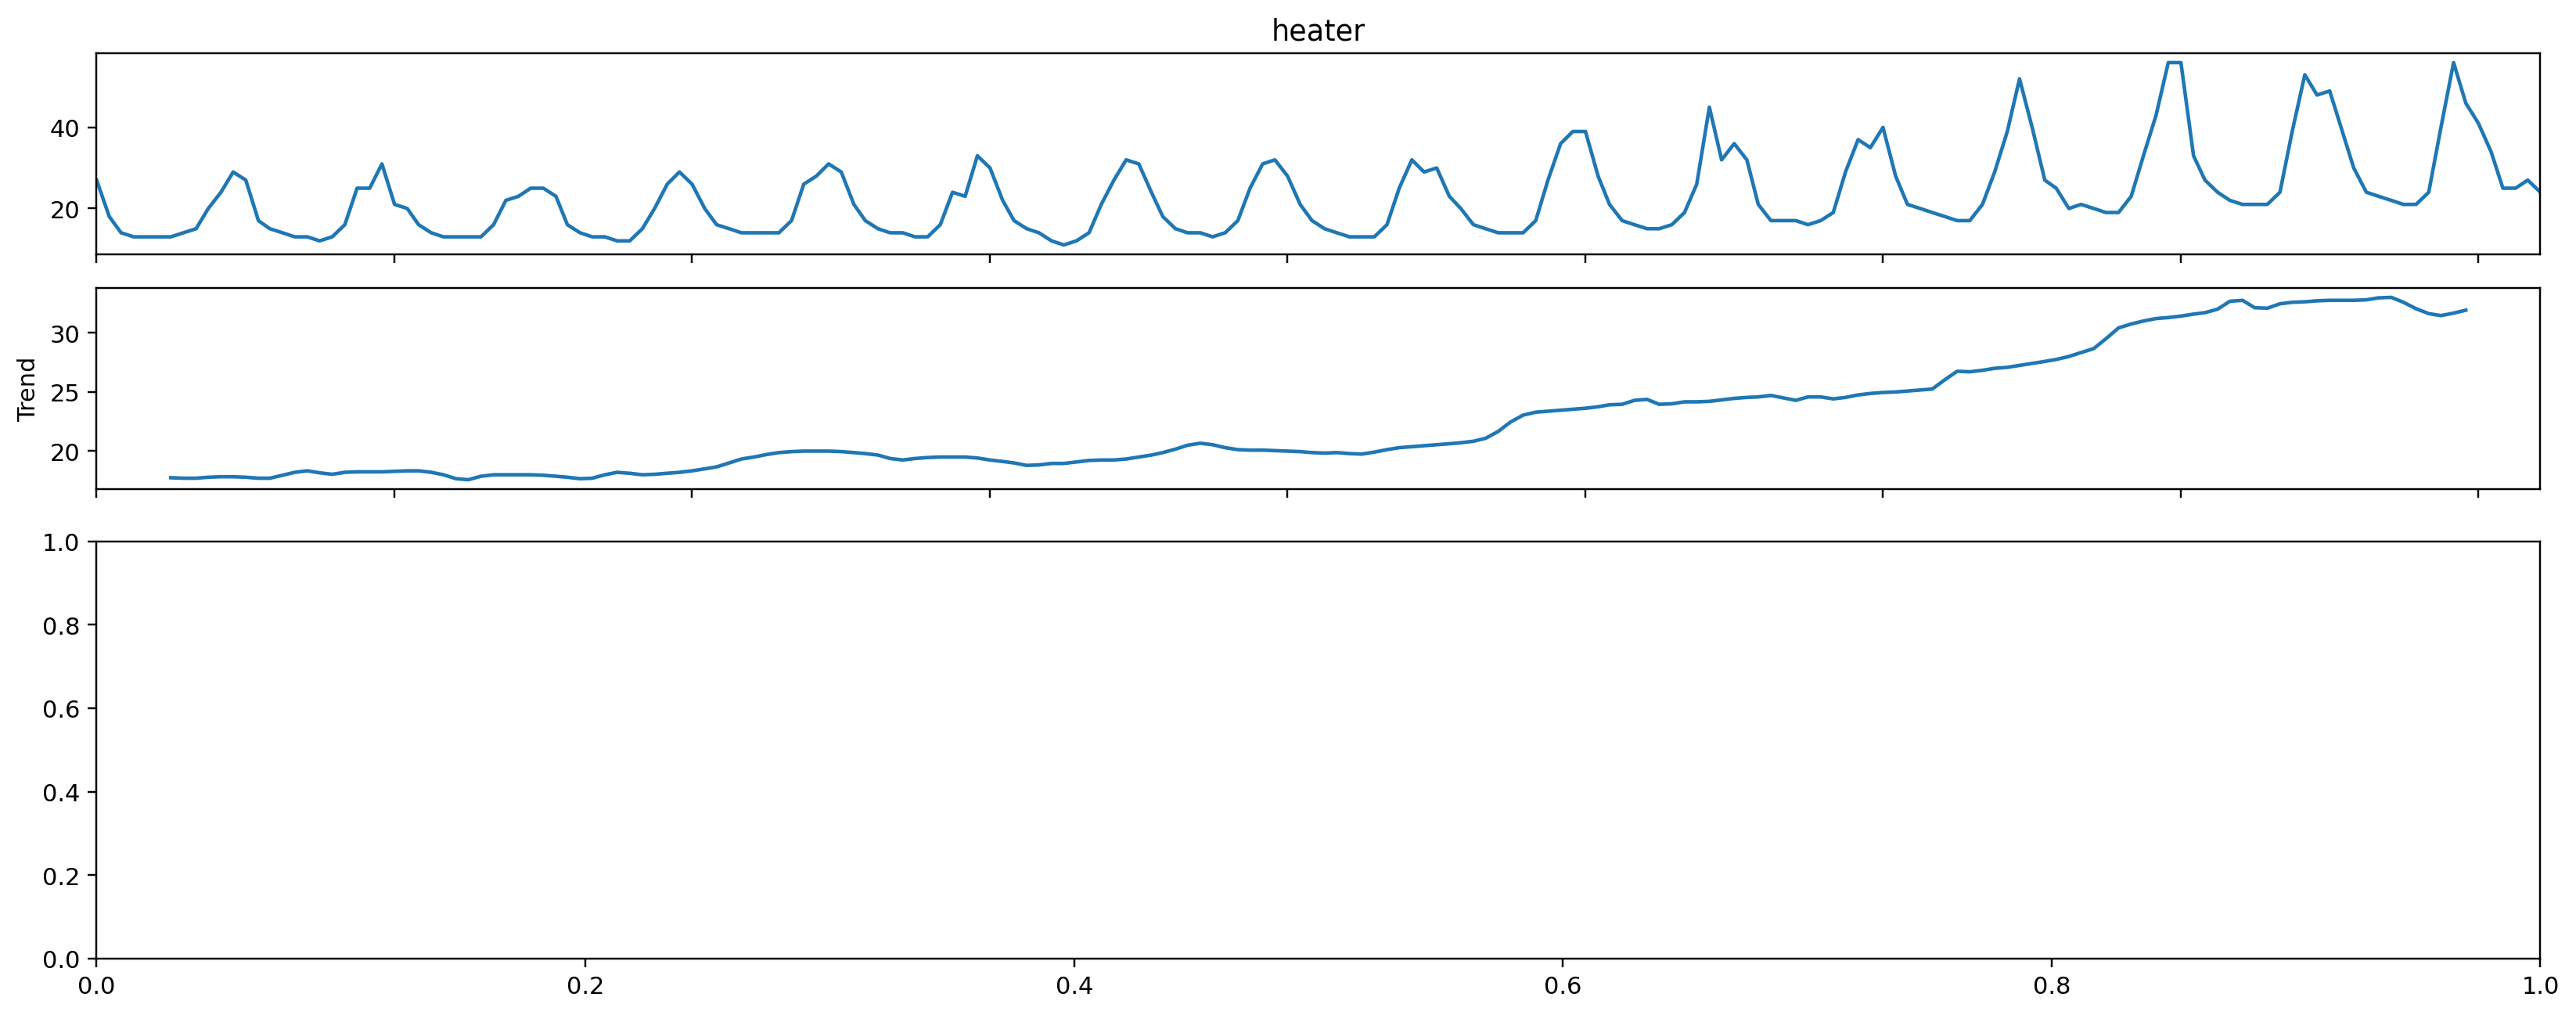

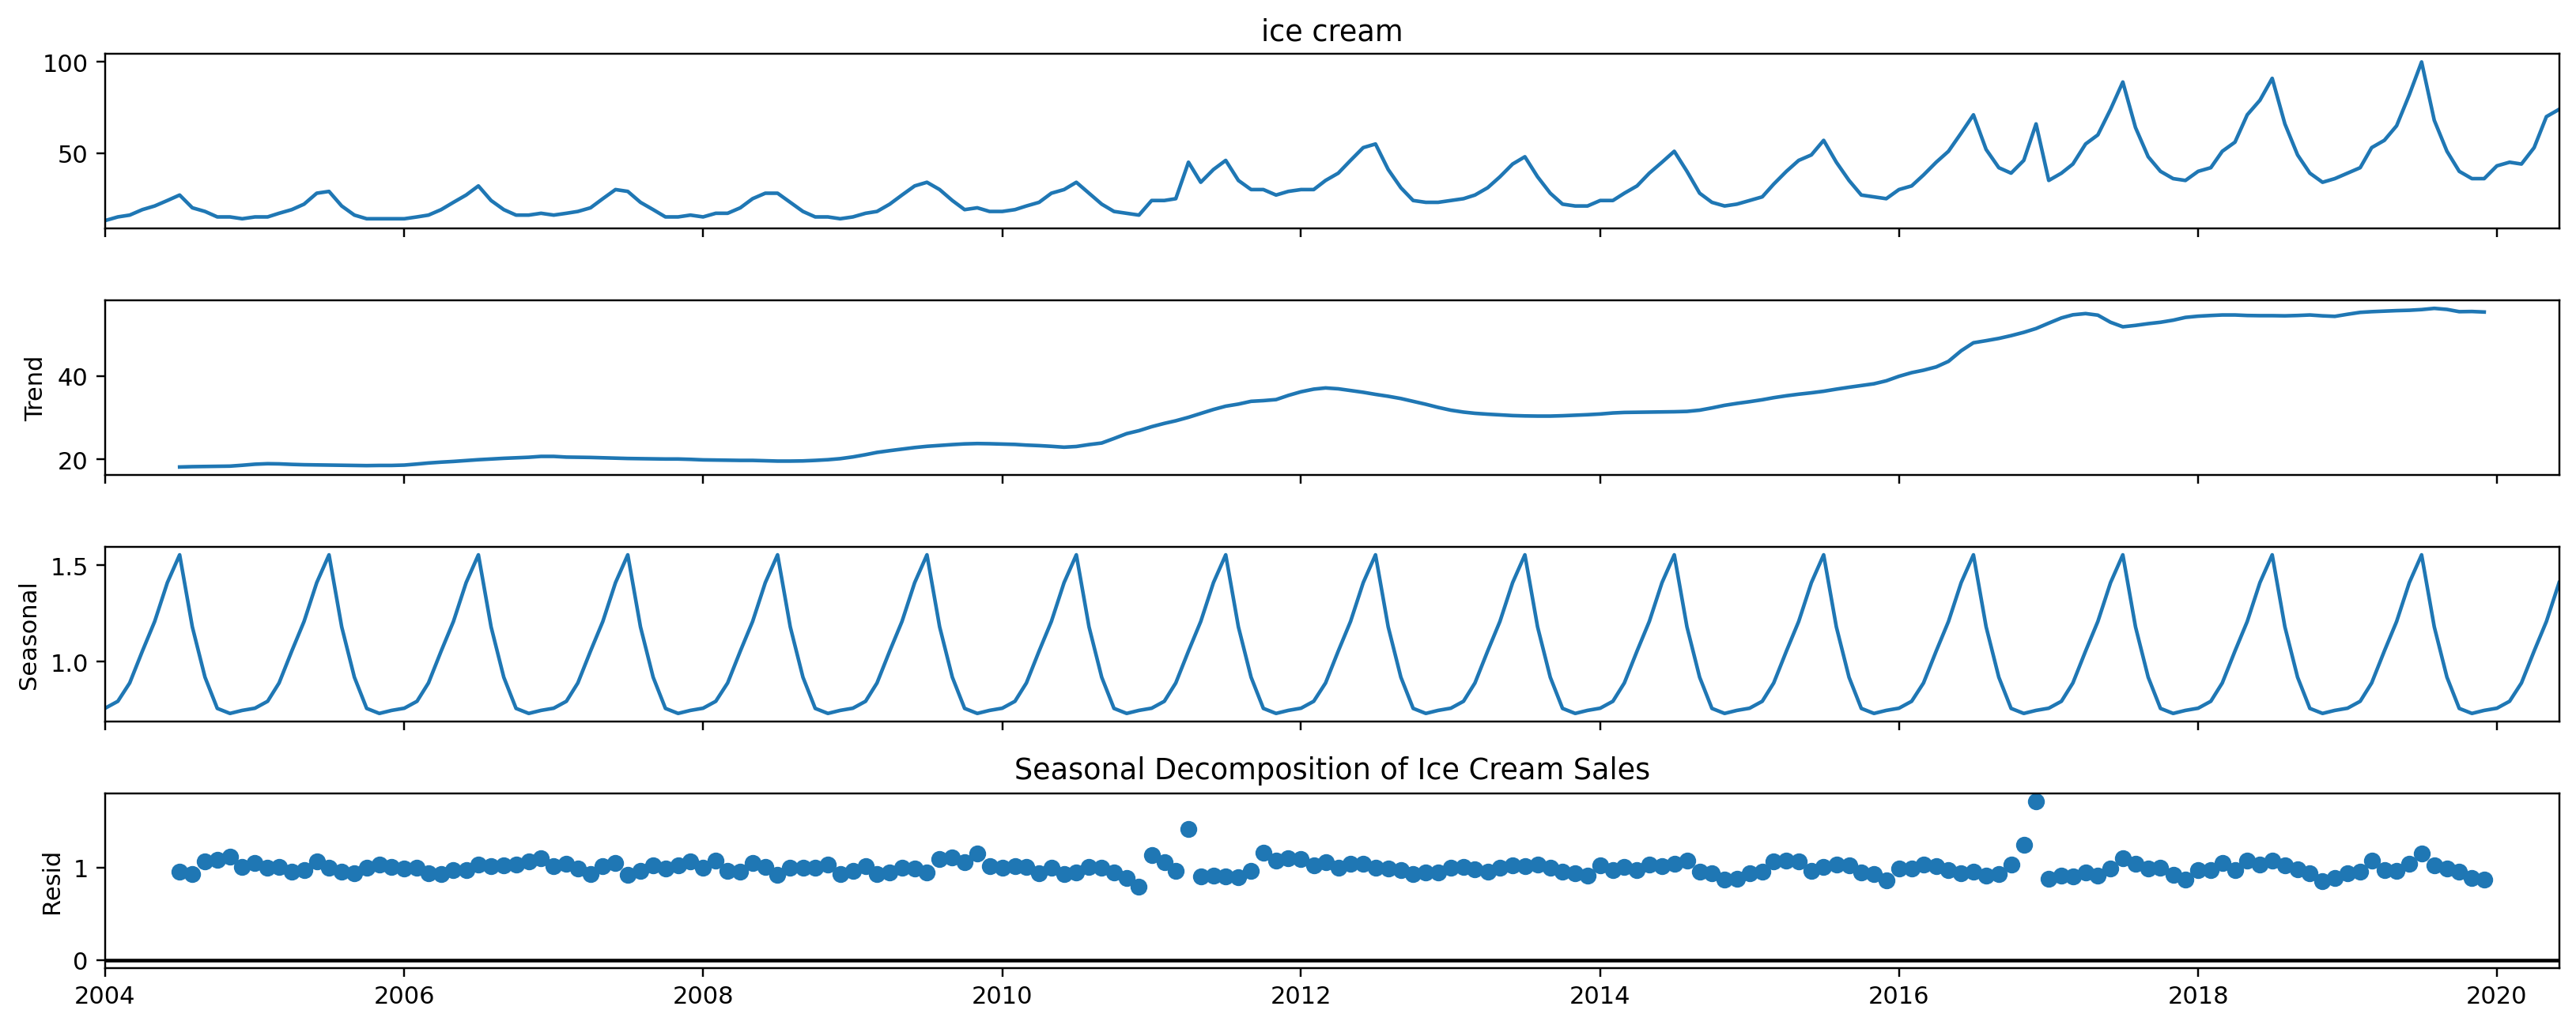

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=['Month'], dayfirst=True, index_col='Month')

result_heater = seasonal_decompose(df['heater'], model='multiplicative', period=12)

result_ice_cream = seasonal_decompose(df['ice cream'], model='multiplicative', period=12)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
result_heater.plot()
plt.title('Seasonal Decomposition of Heater Sales')

plt.subplot(2, 1, 2)
result_ice_cream.plot()
plt.title('Seasonal Decomposition of Ice Cream Sales')

plt.tight_layout()
plt.show()


Conclusion
Autocorrelation Analysis:

1.   Autocorrelation Analysis:
  *   For the FB.csv dataset, autocorrelation plots were generated to assess the temporal dependencies in the Close prices. This analysis helps in understanding the persistence of price movements over time, which is crucial for time series forecasting and trading strategies.
  *   For the ice_cream_vs_heater.csv dataset, autocorrelation plots were generated for heater and ice cream sales. This analysis revealed any patterns or correlations in sales data, which could help in understanding seasonal effects or periodic trends.


2.   Seasonal Decomposition:
  *   n the FB.csv dataset, seasonal decomposition of the Close prices was performed using a multiplicative model with a period of 365 days, though stock prices are often more irregular and may not exhibit clear seasonal patterns.
  *   For the ice_cream_vs_heater.csv dataset, seasonal decomposition was conducted separately for heater and ice cream sales using a multiplicative model with a period of 12 months. This analysis decomposed the sales data into trend, seasonal, and residual components, providing insights into seasonal variations and trends in sales.


3.   Deseasoning:
  *   For the FB.csv dataset, the deseasoned Close prices were computed by dividing the original series by the seasonal component. This helped to isolate the trend and residual components from seasonal fluctuations.
  *   For the ice_cream_vs_heater.csv dataset, deseasoning was performed similarly for both heater and ice cream sales, which facilitated a clearer understanding of underlying trends by removing seasonal effects.

4.   Monthly Boxplots:
  *   For the ice_cream_vs_heater.csv dataset, monthly boxplots of heater and ice cream sales were created. These plots visually summarized the distribution of sales across different months, highlighting variations and identifying any unusual patterns or trends in monthly sales data.



